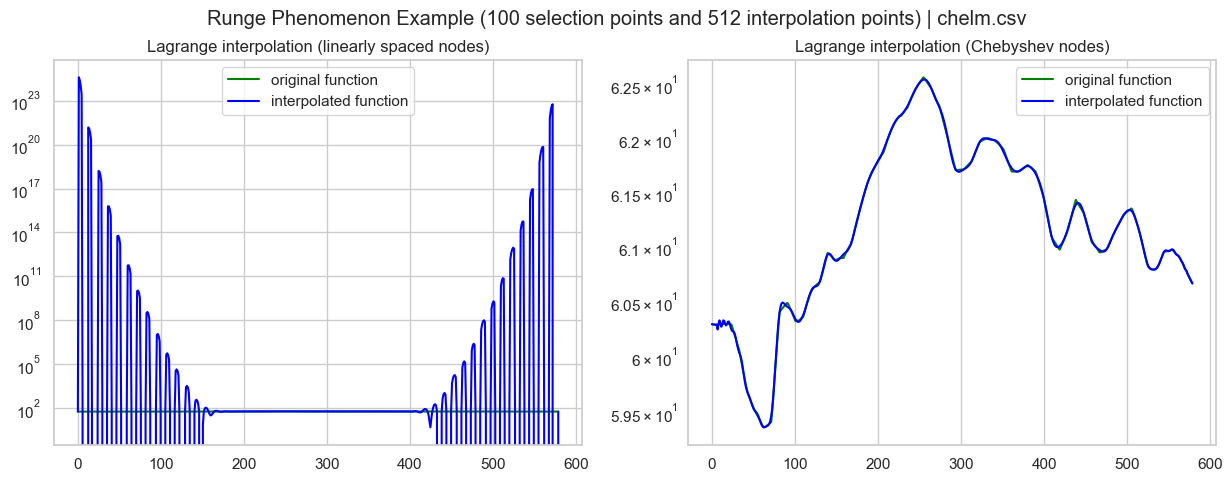

In [14]:
%reset -f
import matplotlib.pyplot as plt
import seaborn as sns
from helper import *

POINTS = 100
INTERPOLATION_POINTS = 512

nodes = read_nodes("../data/chelm.csv")

sns.set_theme()
sns.set_style("whitegrid")

fig, axs = plt.subplots(1,2)
fig.set_size_inches(15, 5)
fig.suptitle(f'Runge Phenomenon Example ({POINTS} selection points and {INTERPOLATION_POINTS} interpolation points) | chelm.csv')

# Linspace
selected_points = get_selection_points(nodes, linspace, POINTS)
x = get_interpolation_points(nodes, INTERPOLATION_POINTS)
y = lagrange_interpolation(selected_points, x)
axs[0].set_title('Lagrange interpolation (linearly spaced nodes)')
axs[0].set_yscale('log')
axs[0].plot(get_x_values(nodes), get_y_values(nodes), color='green')
axs[0].plot(x, y, color='blue')
axs[0].legend(['original function', 'interpolated function'])

# Chebyshev
selected_points = get_selection_points(nodes, chebyshev_nodes, POINTS)
x = get_interpolation_points(nodes, INTERPOLATION_POINTS)
y = lagrange_interpolation(selected_points, x)
axs[1].set_title('Lagrange interpolation (Chebyshev nodes)')
axs[1].set_yscale('log')
axs[1].plot(get_x_values(nodes), get_y_values(nodes), color='green')
axs[1].plot(x, y, color='blue')
axs[1].legend(['original function', 'interpolated function'])

fig.savefig(f'../plots/runge_phenomenon_example.png')

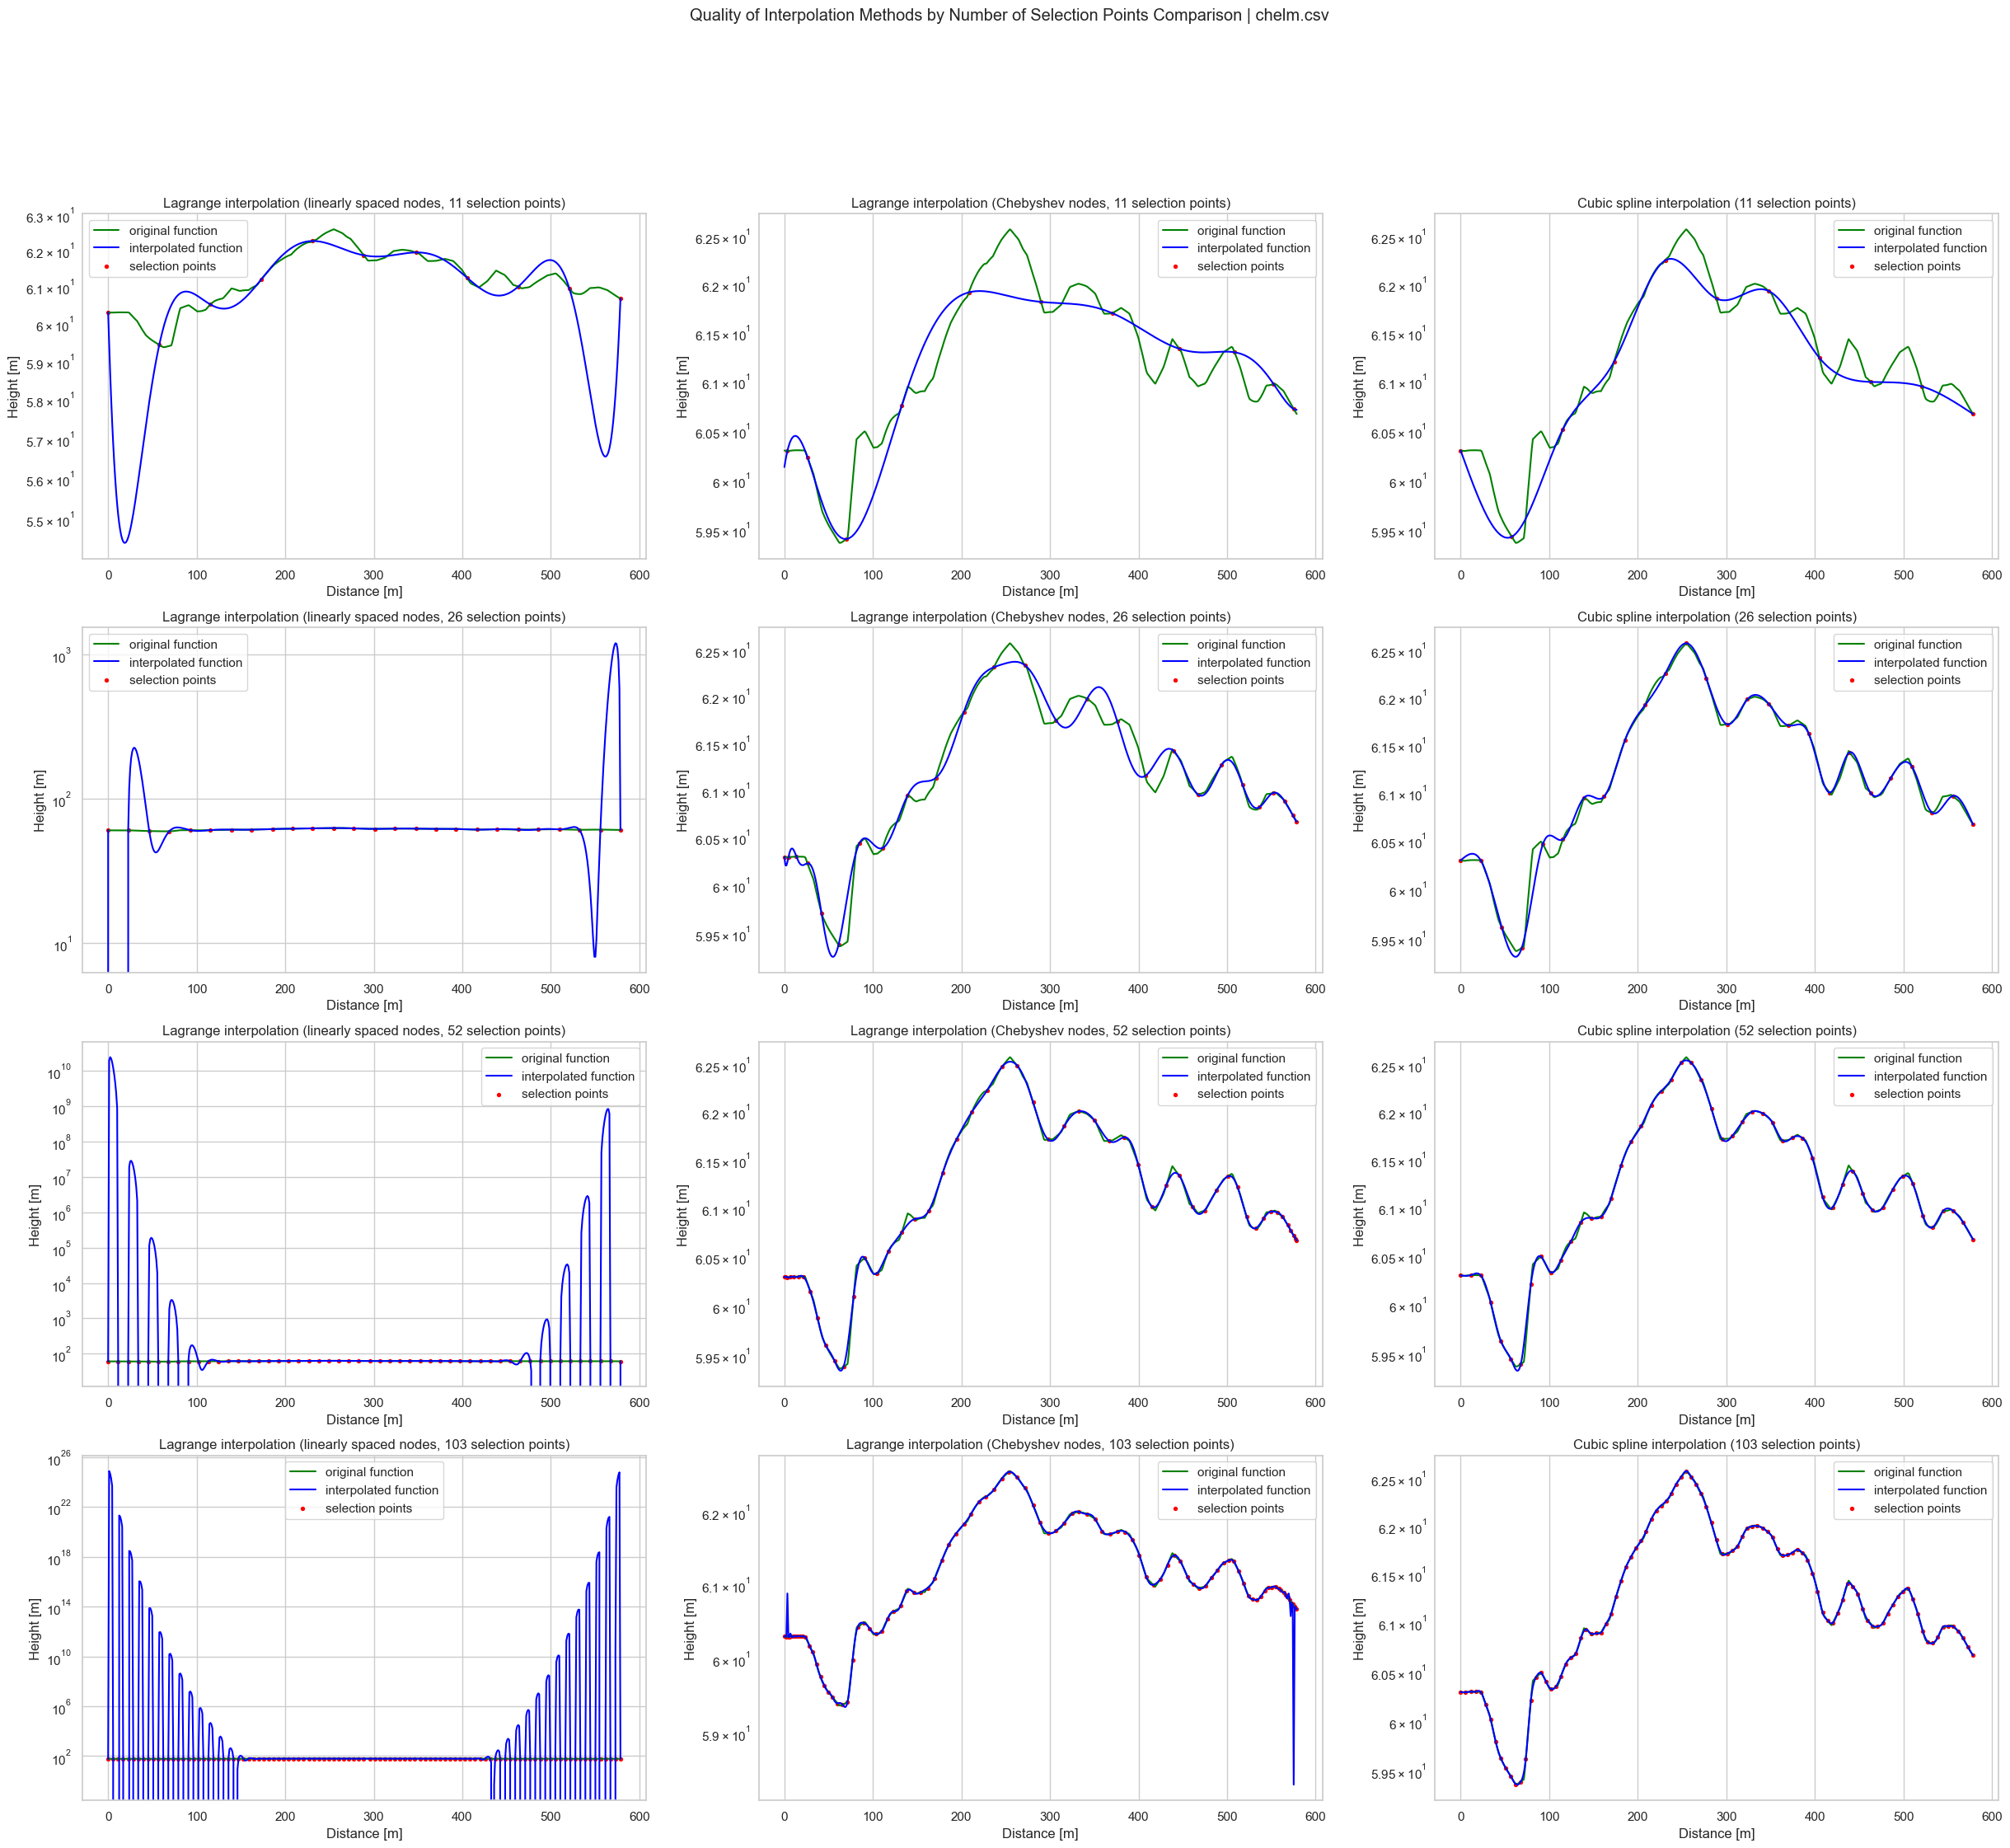

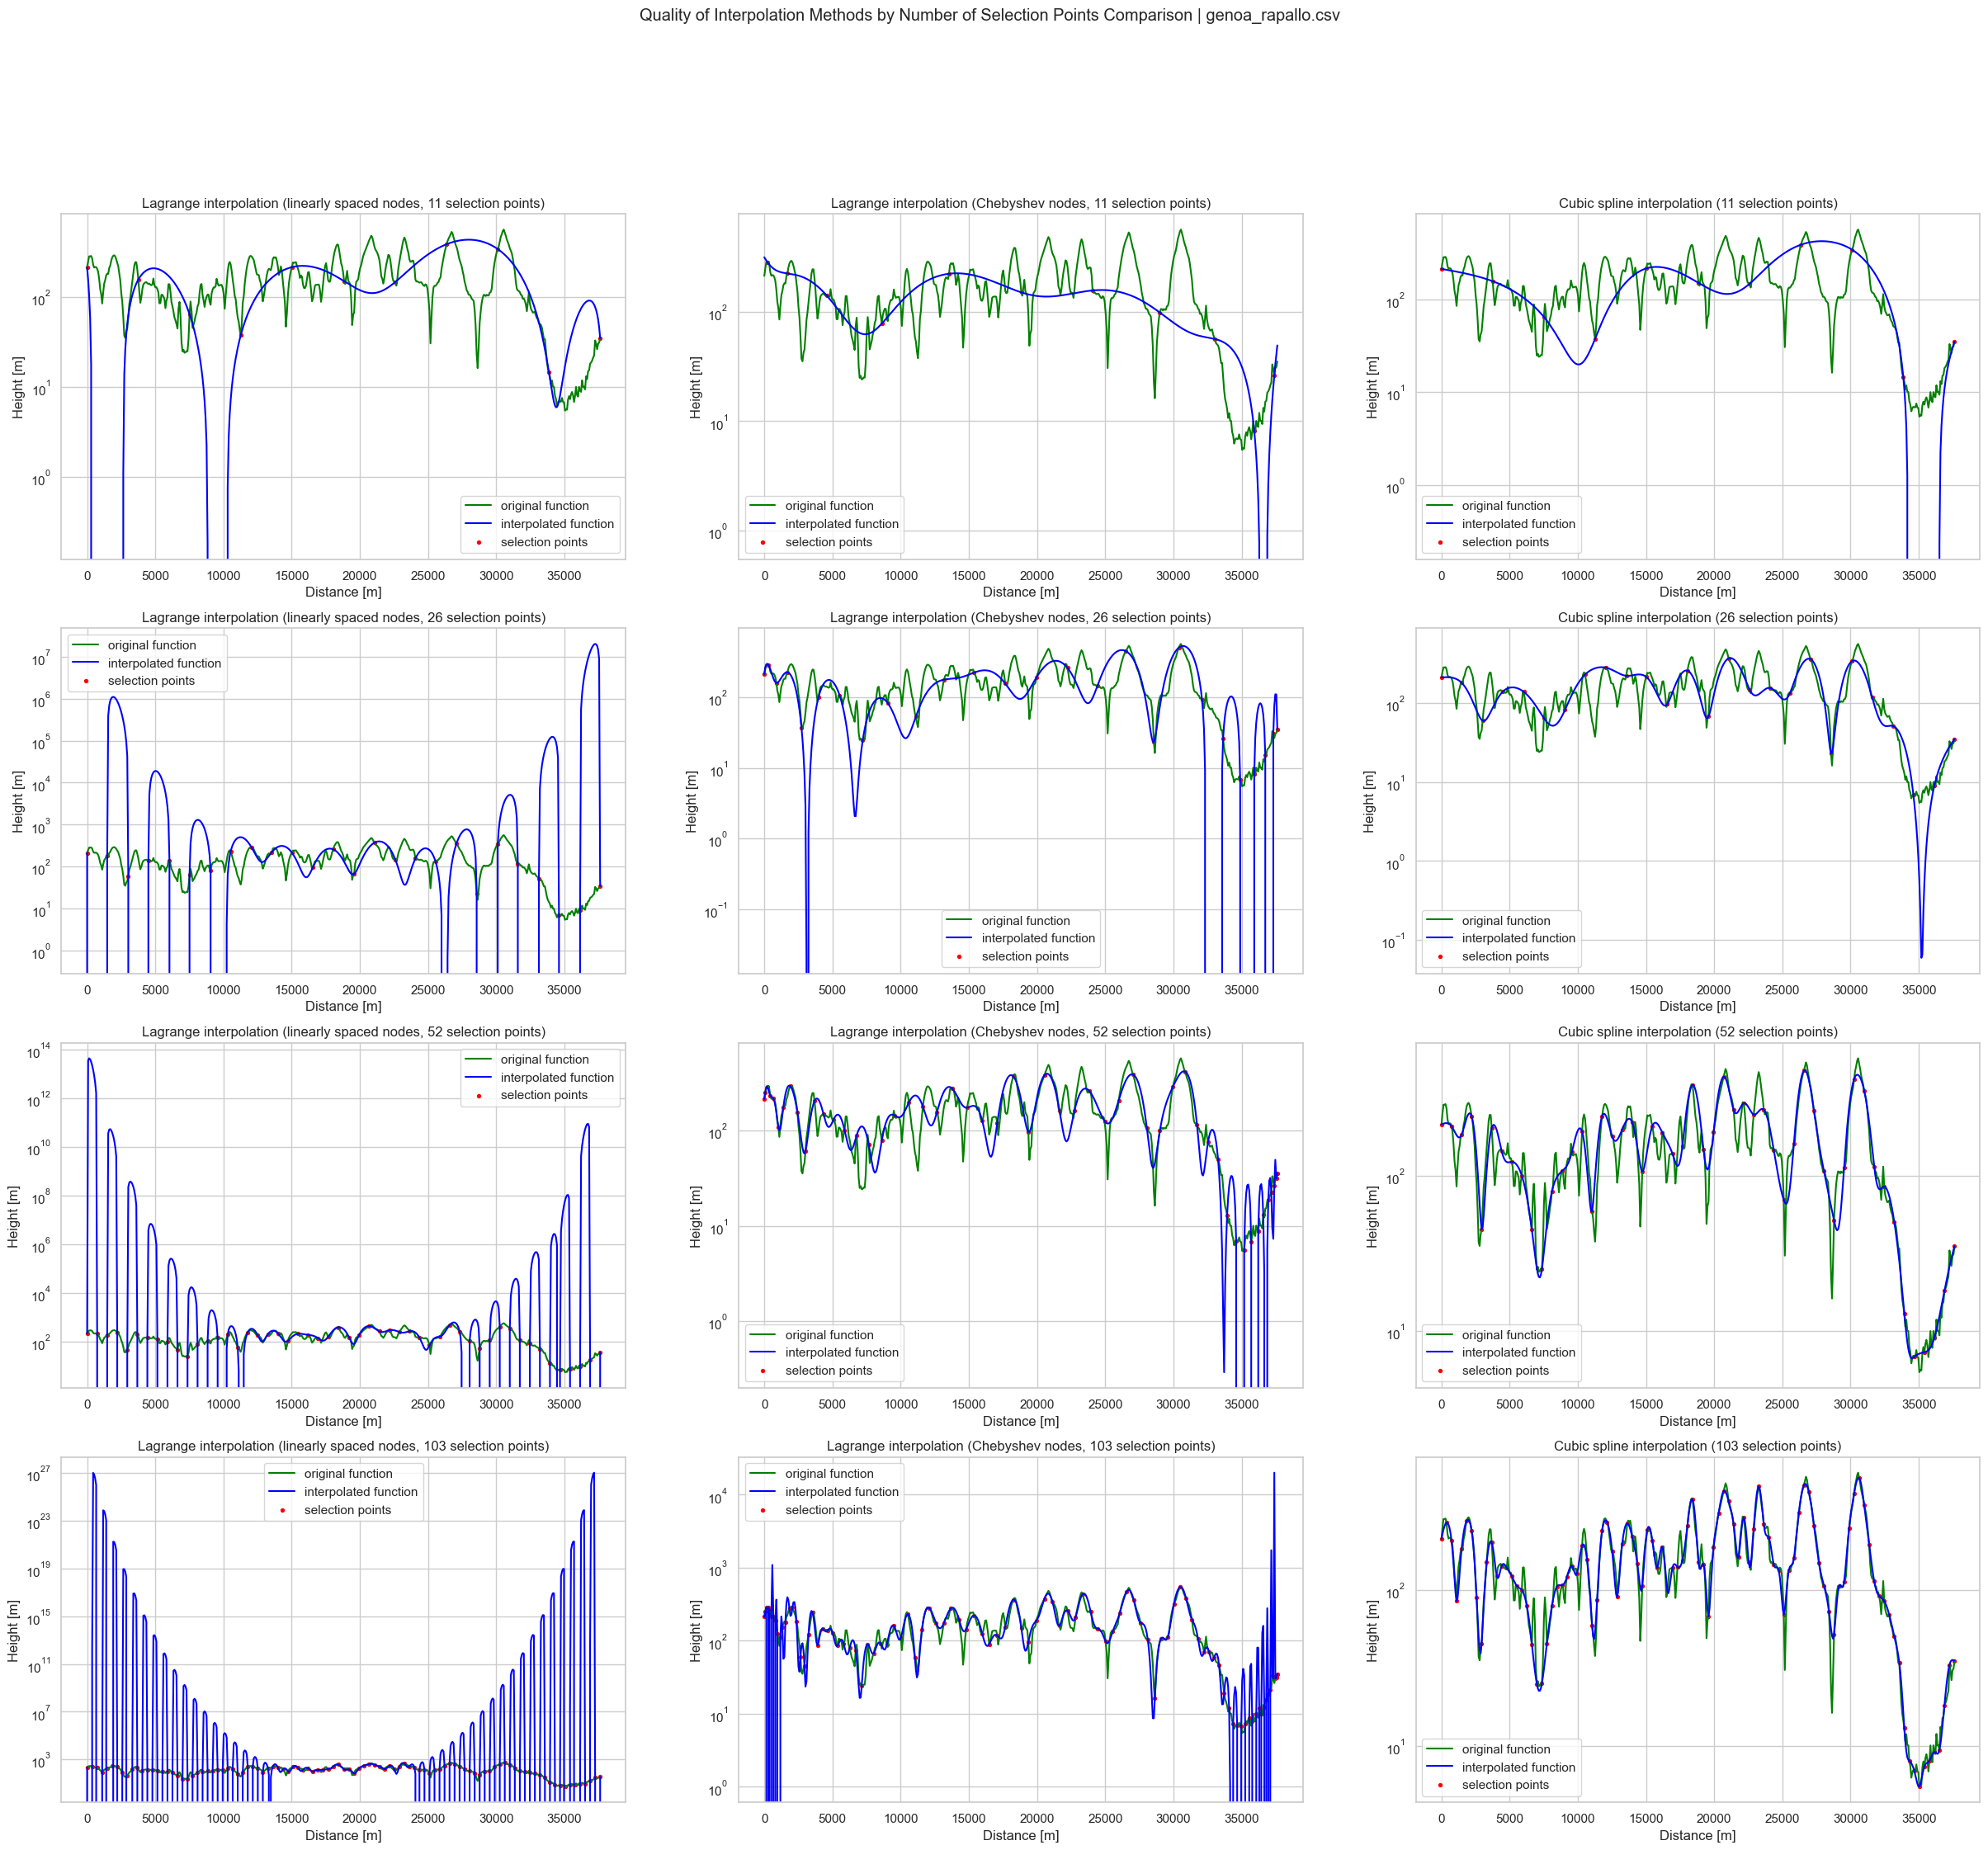

In [15]:
%reset -f
import matplotlib.pyplot as plt
import seaborn as sns
from helper import *
from typing import List, Tuple, Callable
from pathlib import Path

sns.set_theme()
sns.set_style("whitegrid")

def plot_interpolation(
        handler: any,
        data: List[Tuple[float, float]],
        selection_points_strategy: Callable[[float, float, int], List[float]],
        selection_points: int,
        interpolation_method: Callable[[List[Tuple[float, float]], List[float]], List[float]],
        title: str
    ) -> None:
    selected_points = get_selection_points(data, selection_points_strategy, selection_points)
    x_points = get_interpolation_points(data, 512)
    y_points = interpolation_method(selected_points, x_points)

    handler.plot(get_x_values(data), get_y_values(data), color='green')
    handler.plot(x_points, y_points, color='blue')
    handler.scatter(get_x_values(selected_points), get_y_values(selected_points), color='red', s=8)

    handler.title.set_text(title)
    handler.set_yscale('log')
    handler.legend(['original function', 'interpolated function', 'selection points'])
    handler.set_xlabel('Distance [m]')
    handler.set_ylabel('Height [m]')

NUMBERS_OF_SELECTION_POINTS = [11, 26, 52, 103]
DATASETS = ['chelm.csv', 'genoa_rapallo.csv']

Path(f'../plots/quality-by-number-of-selection-points/').mkdir(parents=True, exist_ok=True)
for dataset in DATASETS:
    nodes = read_nodes("../data/" + dataset)
    fig, axs = plt.subplots(len(NUMBERS_OF_SELECTION_POINTS), 3)
    fig.set_size_inches(30, 25)
    fig.suptitle(f'Quality of Interpolation Methods by Number of Selection Points Comparison | {dataset}')
    for i, selection_points in enumerate(NUMBERS_OF_SELECTION_POINTS):
        plot_interpolation(axs[i, 0], nodes, linspace, selection_points, lagrange_interpolation, f'Lagrange interpolation (linearly spaced nodes, {selection_points} selection points)')
        plot_interpolation(axs[i, 1], nodes, chebyshev_nodes, selection_points, lagrange_interpolation, f'Lagrange interpolation (Chebyshev nodes, {selection_points} selection points)')
        plot_interpolation(axs[i, 2], nodes, linspace, selection_points, cubic_spline_interpolation, f'Cubic spline interpolation ({selection_points} selection points)')
    fig.savefig(f'../plots/quality-by-number-of-selection-points/{dataset.replace(".csv", "")}.png')

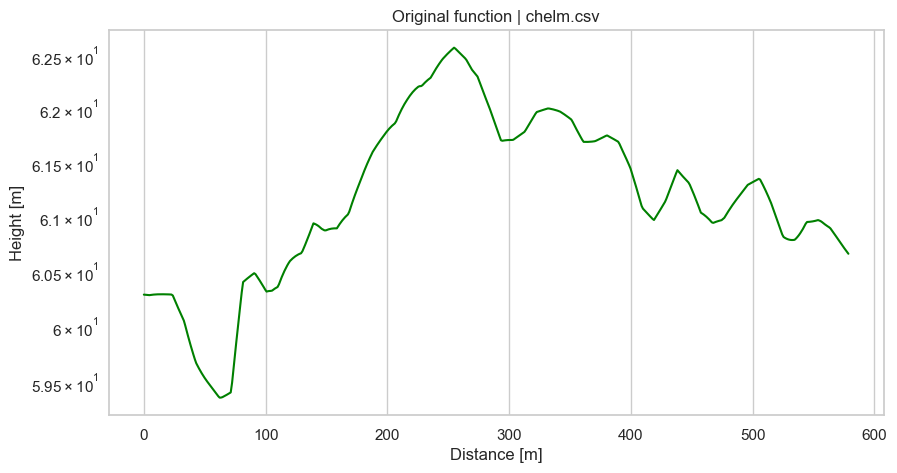

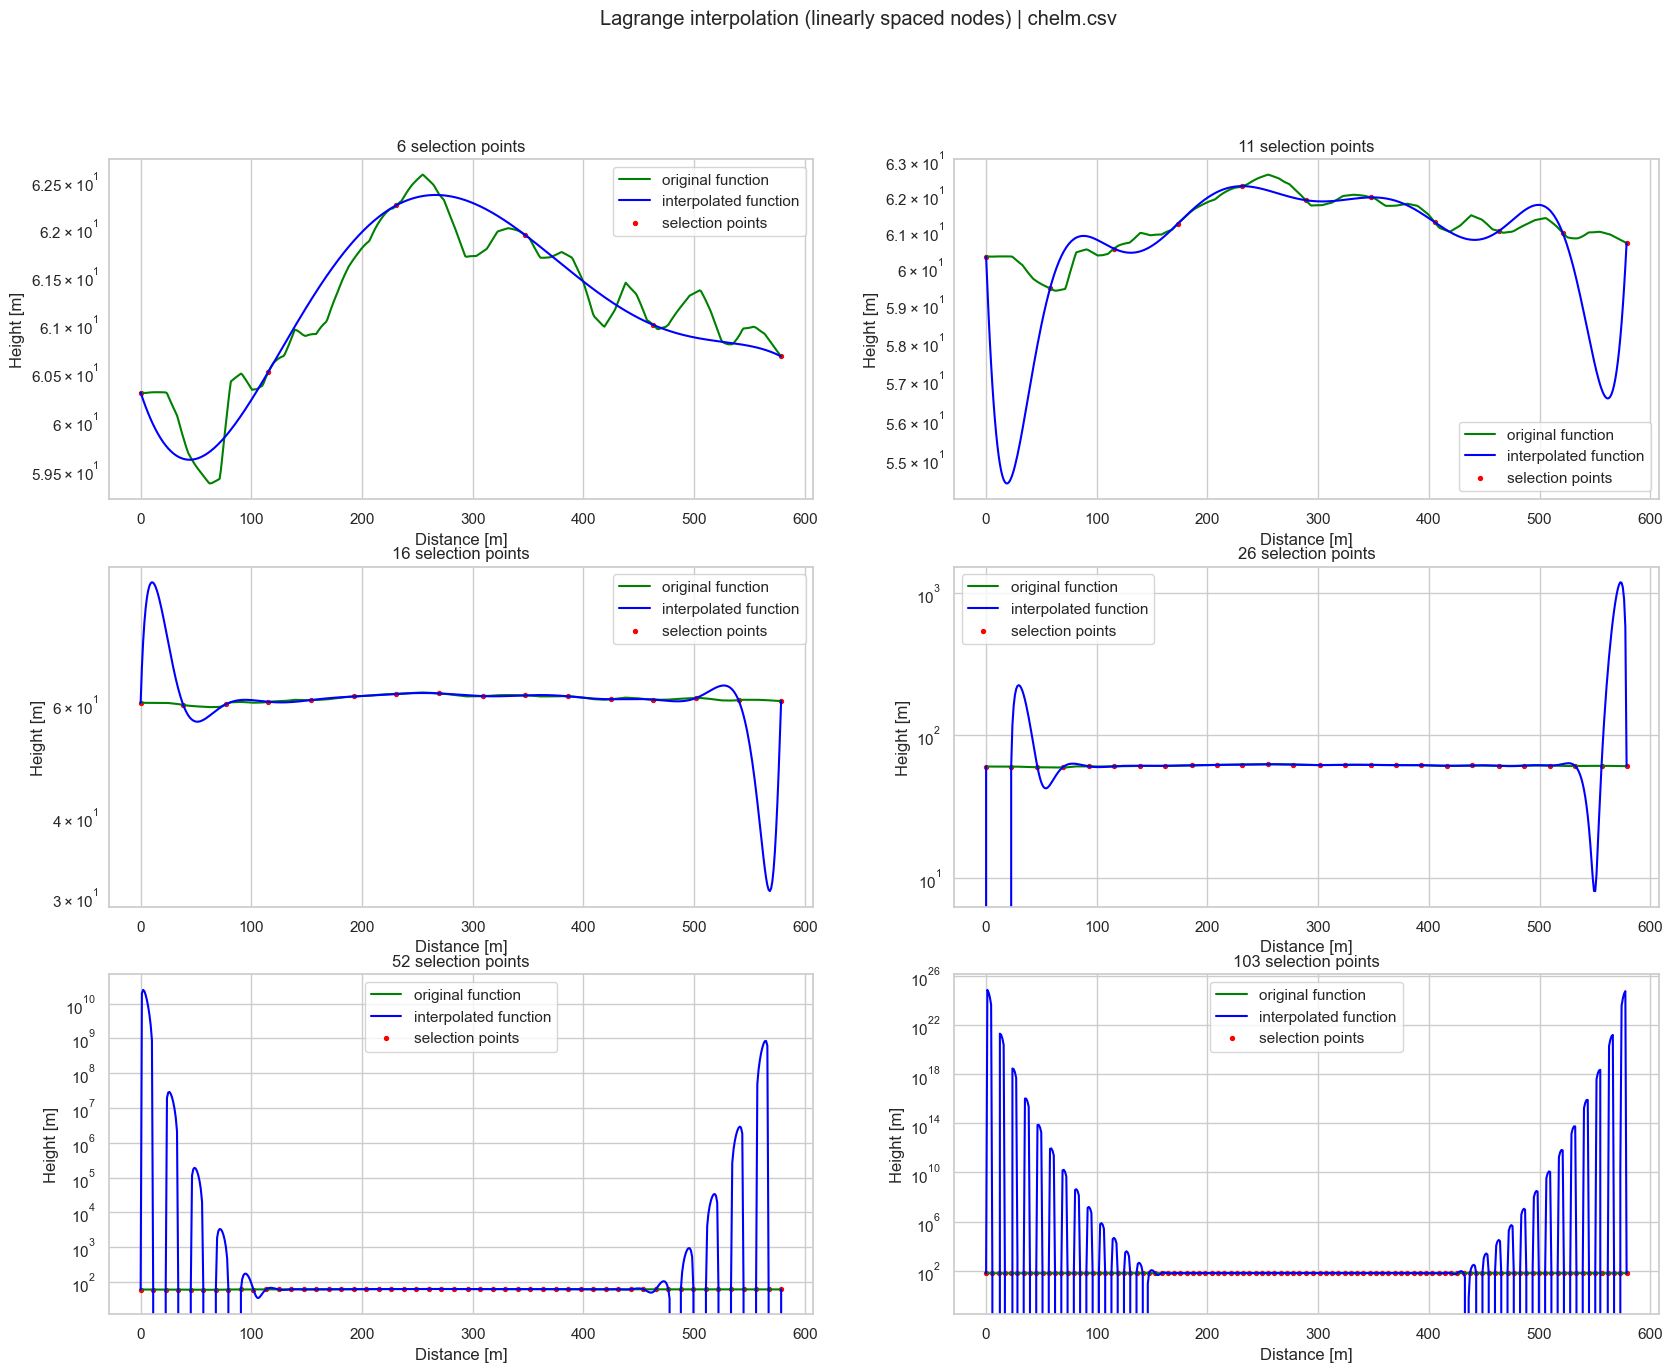

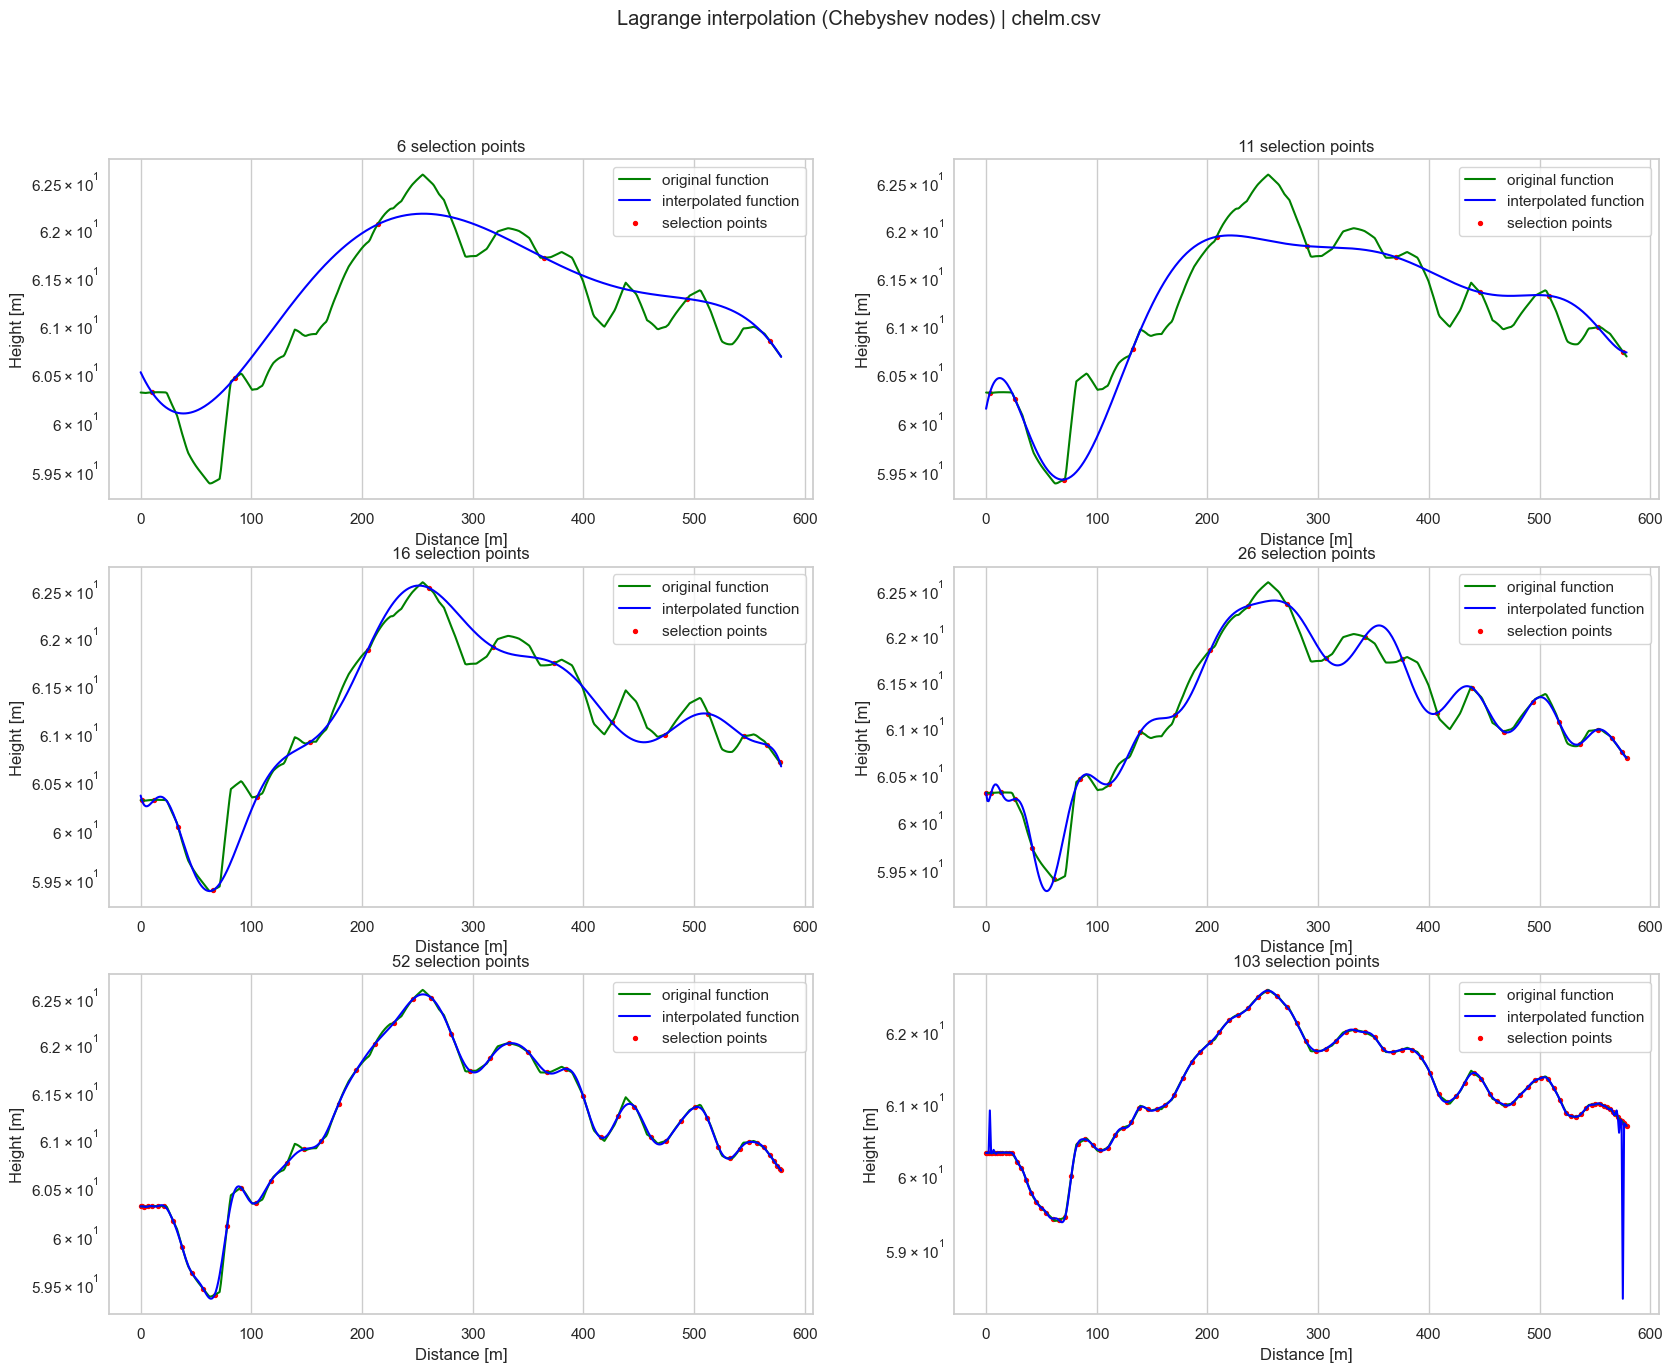

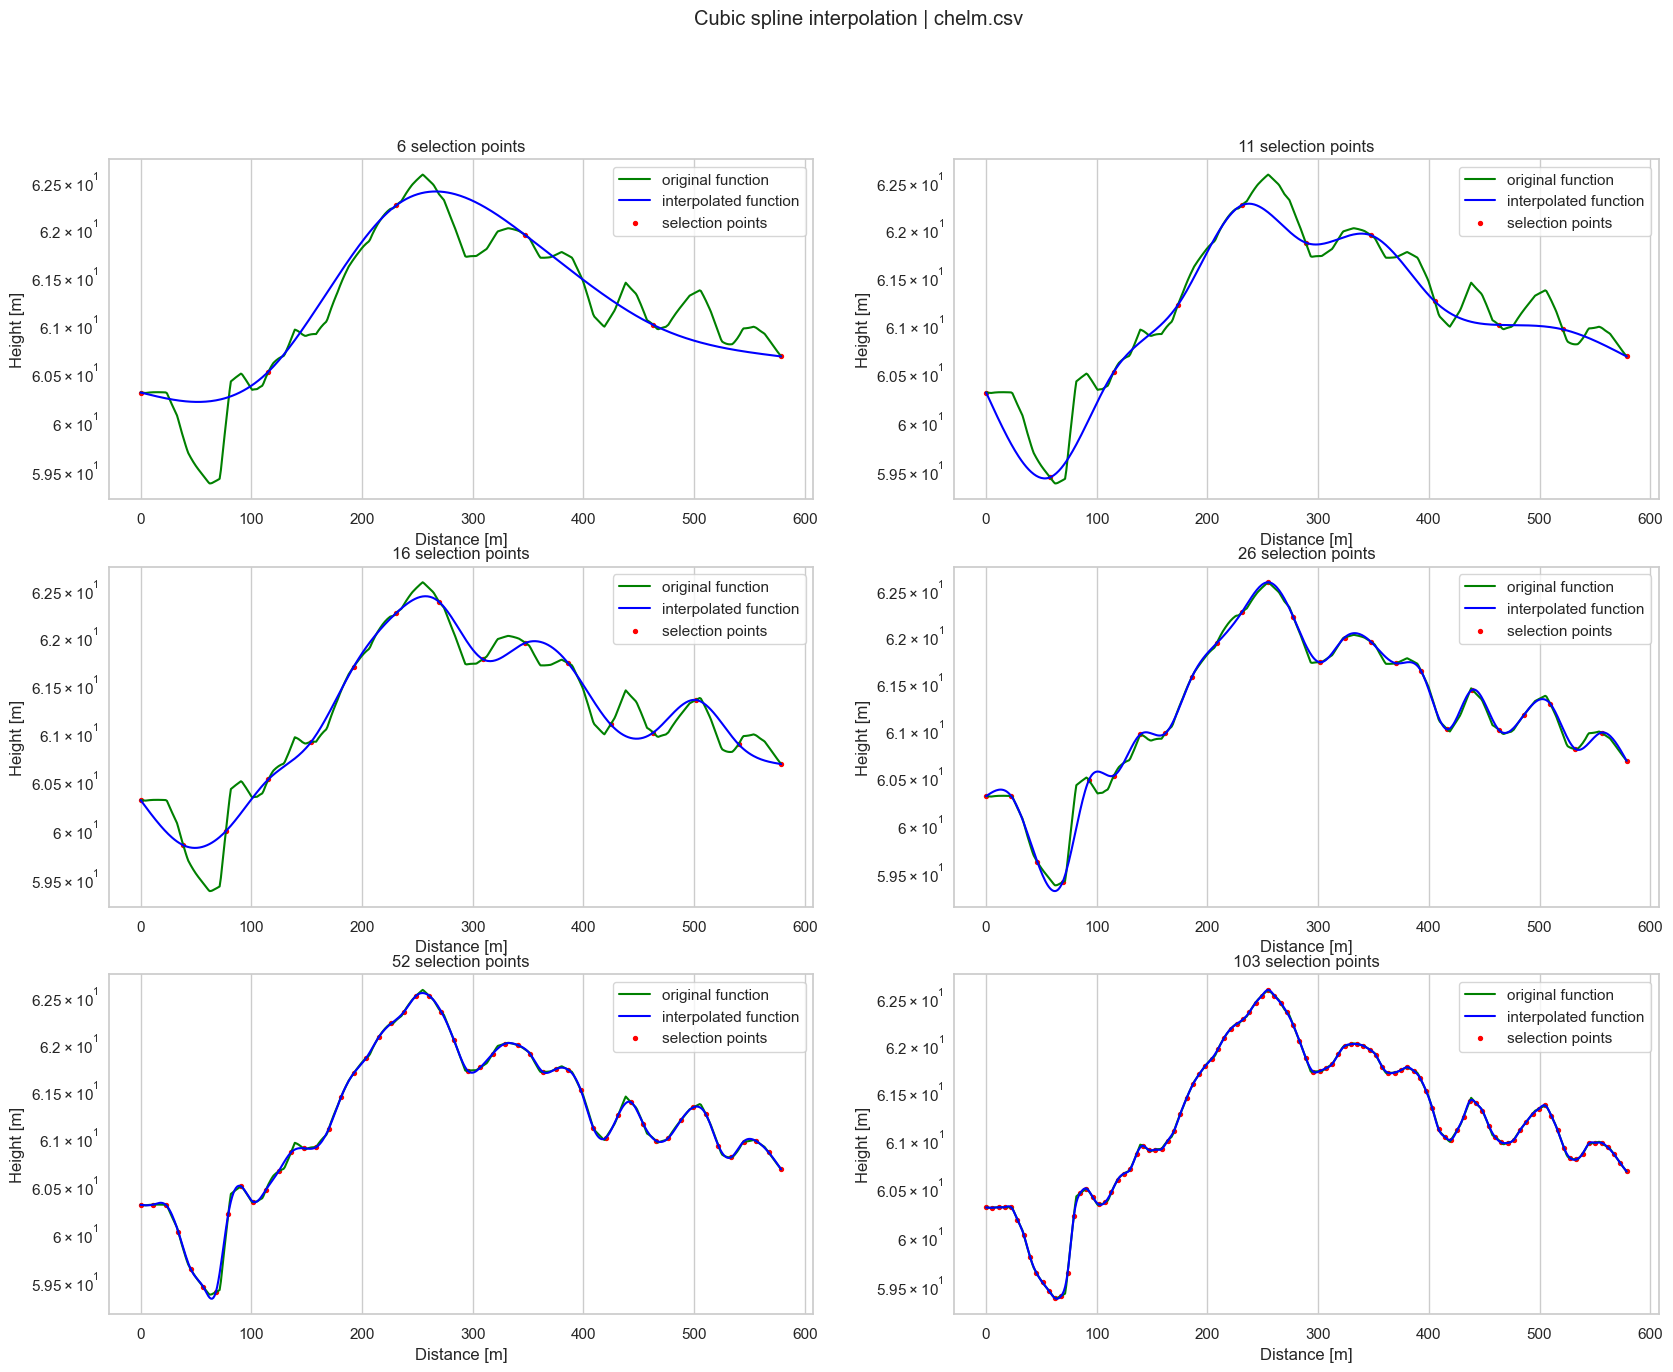

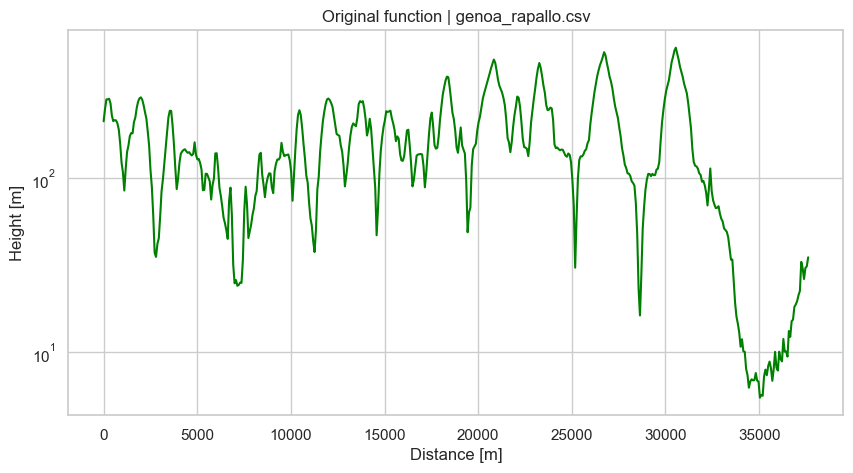

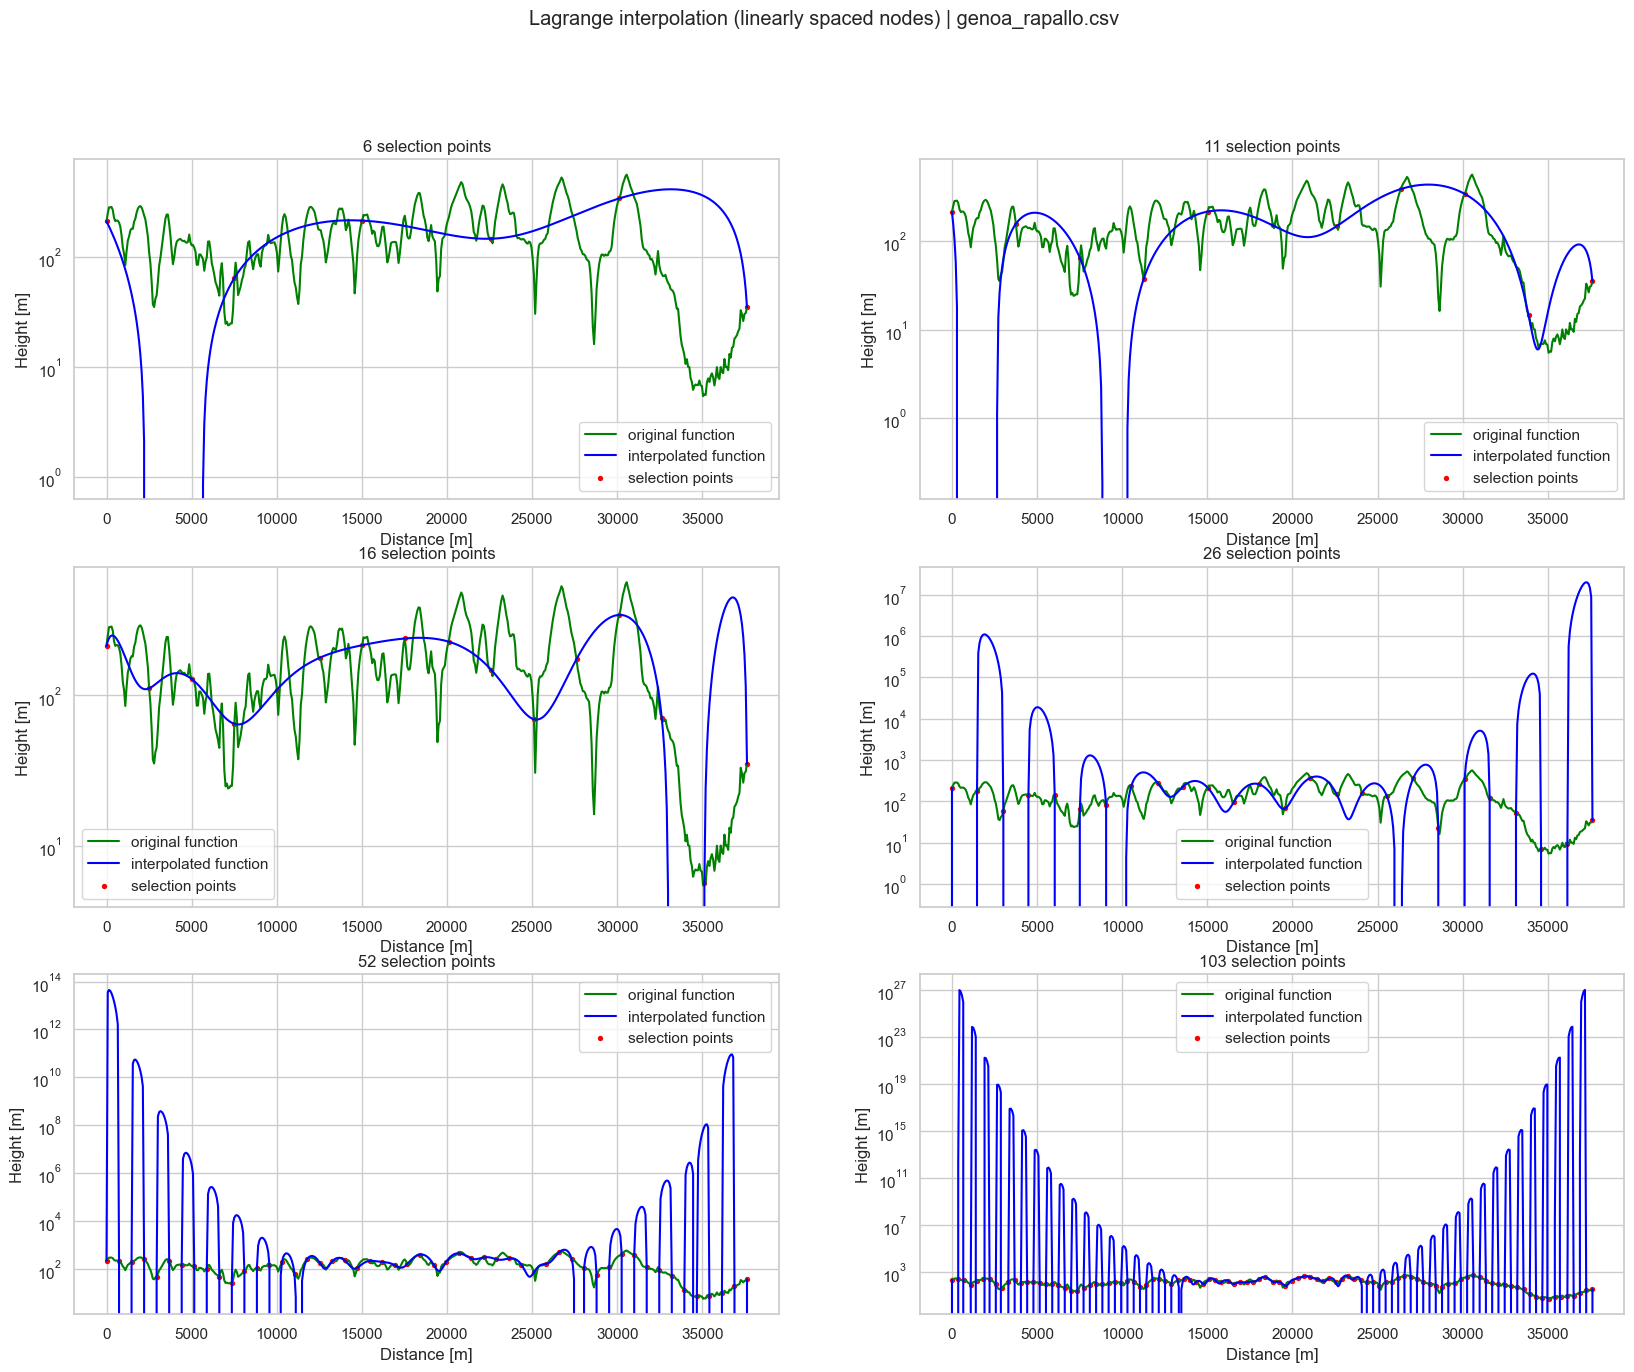

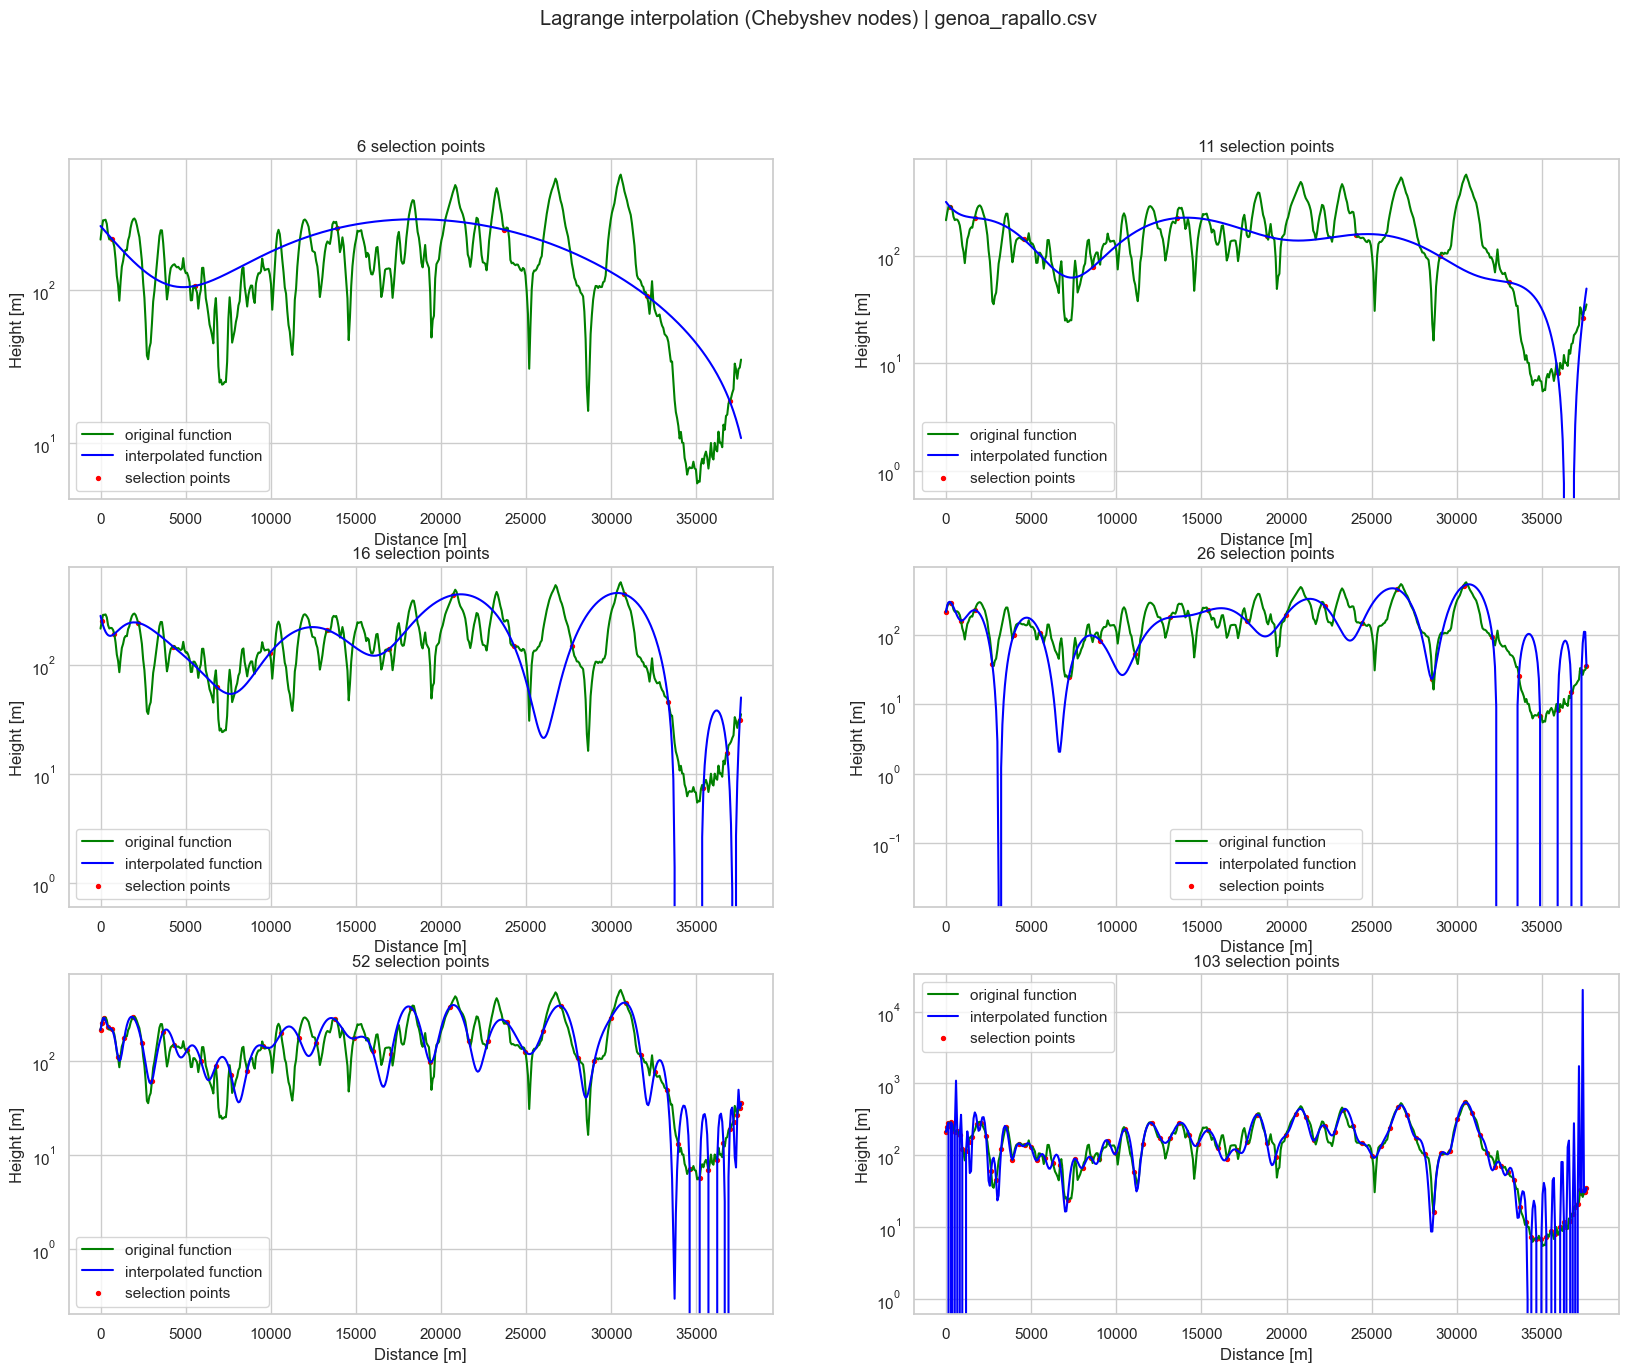

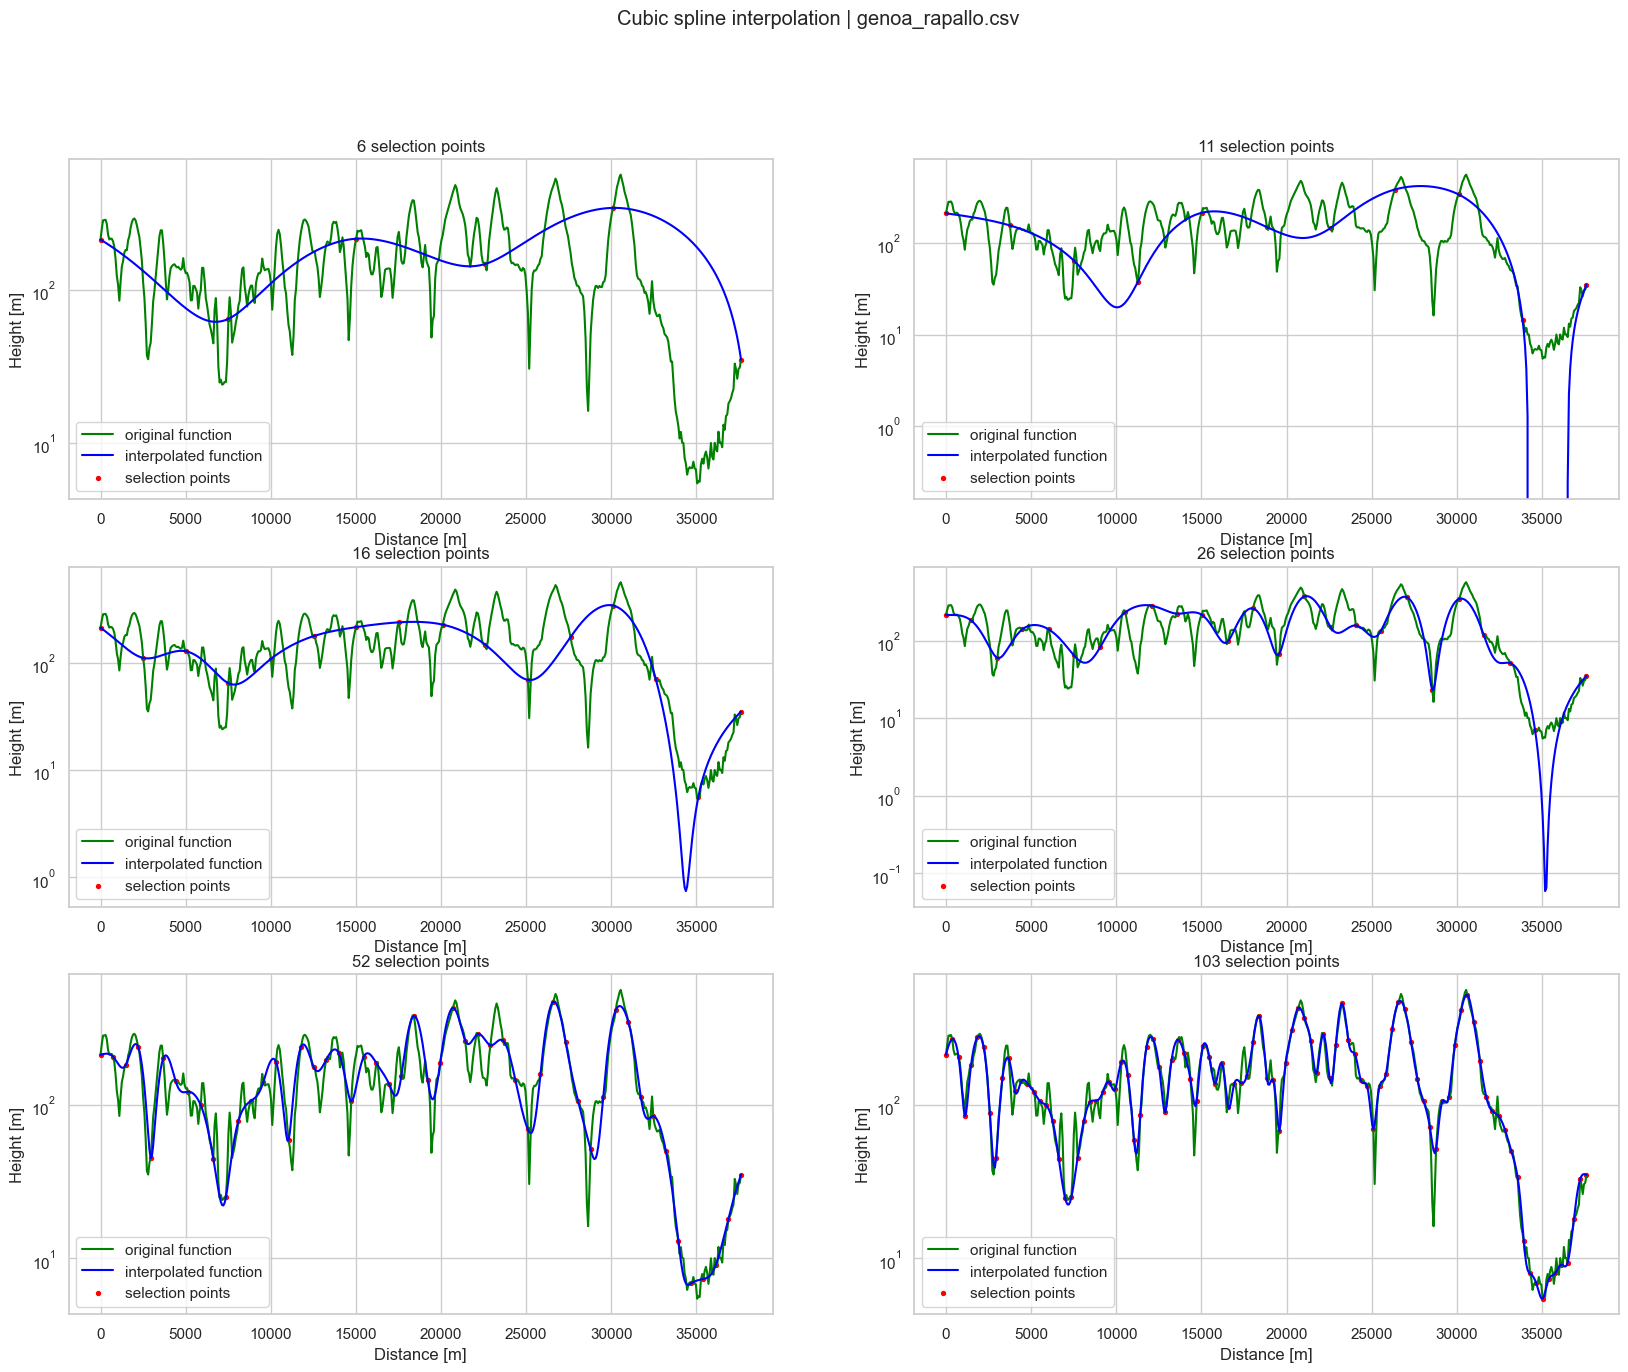

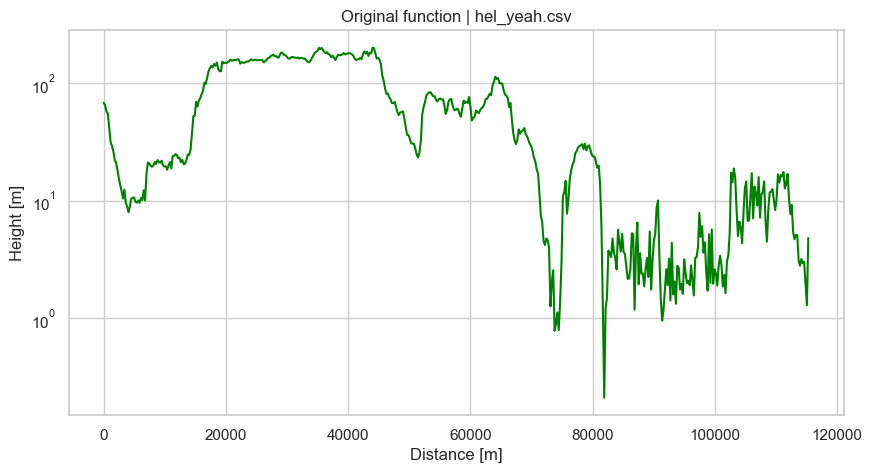

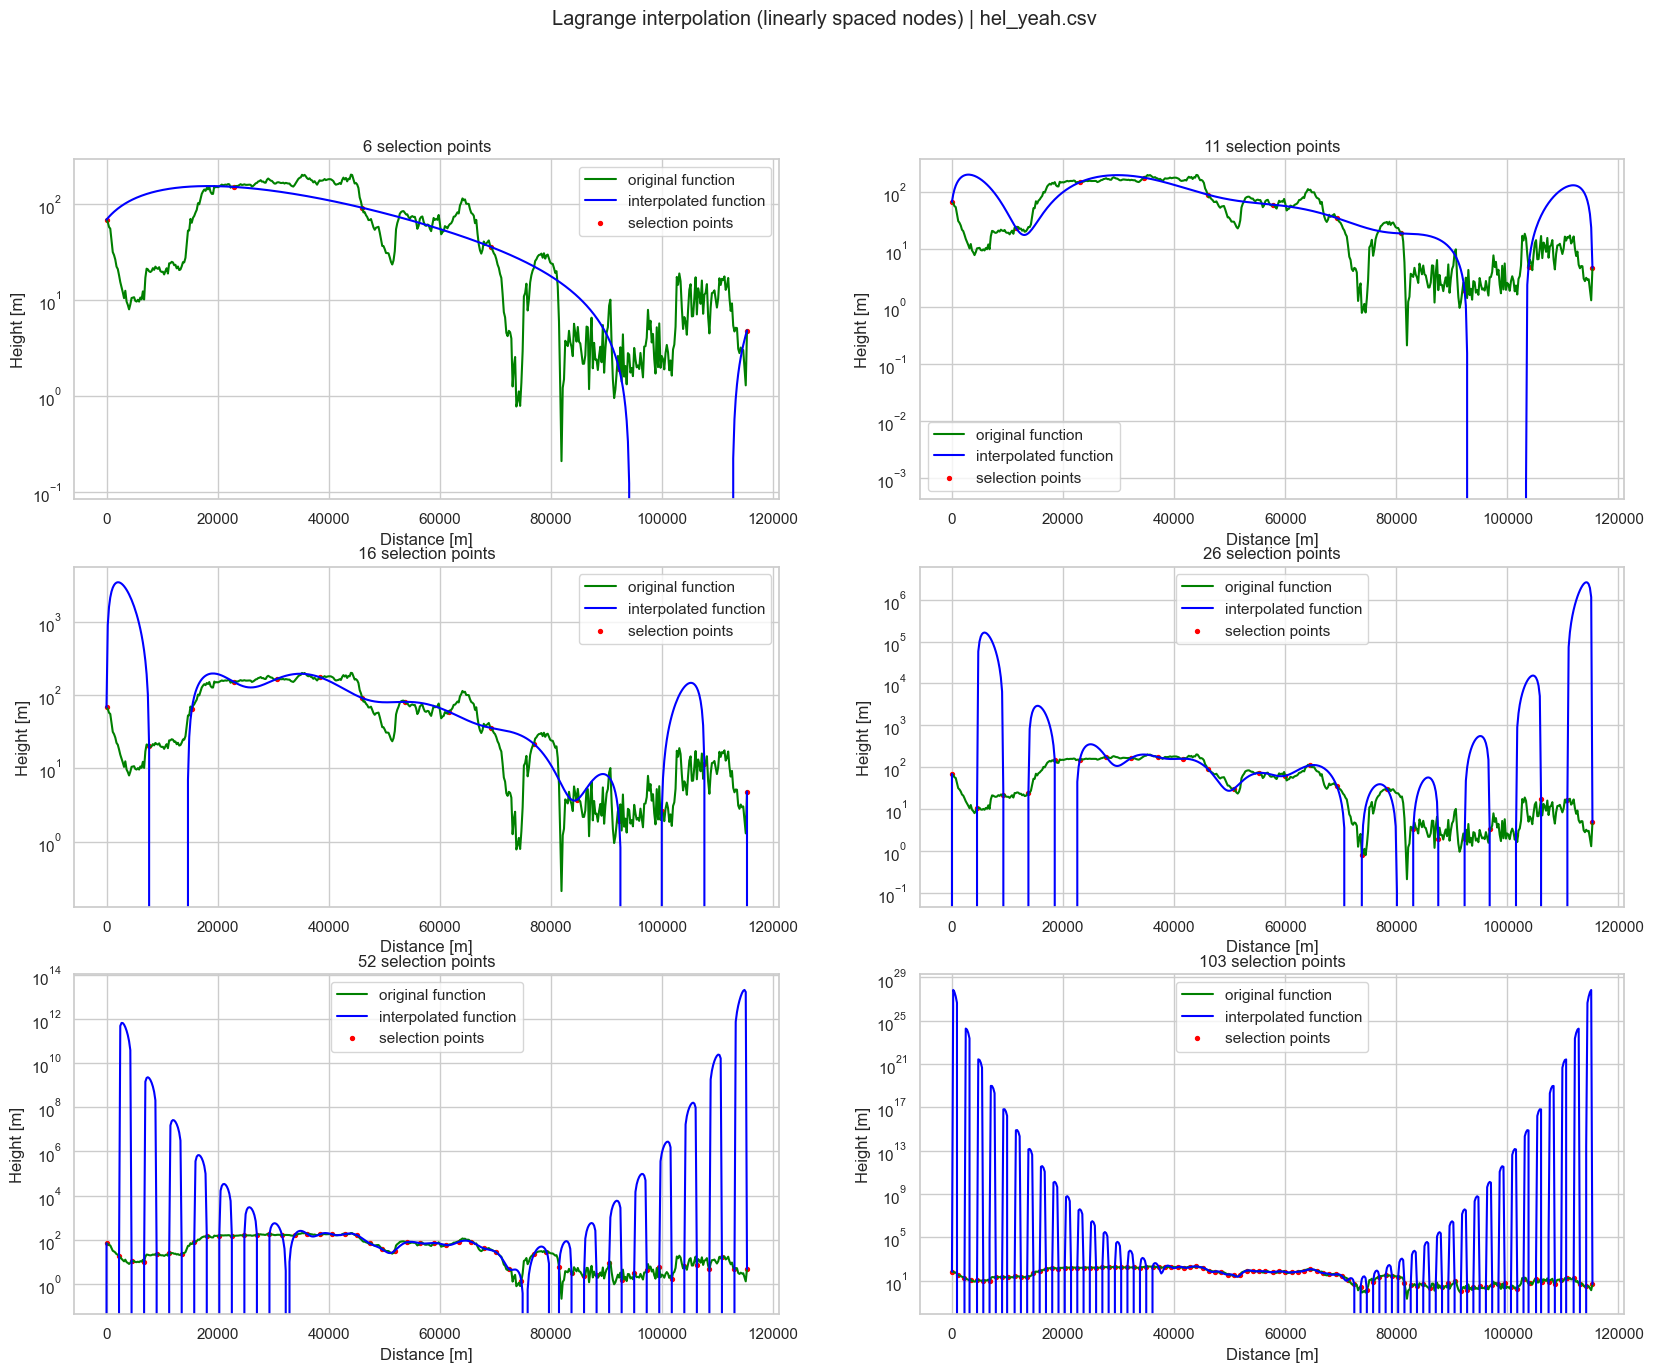

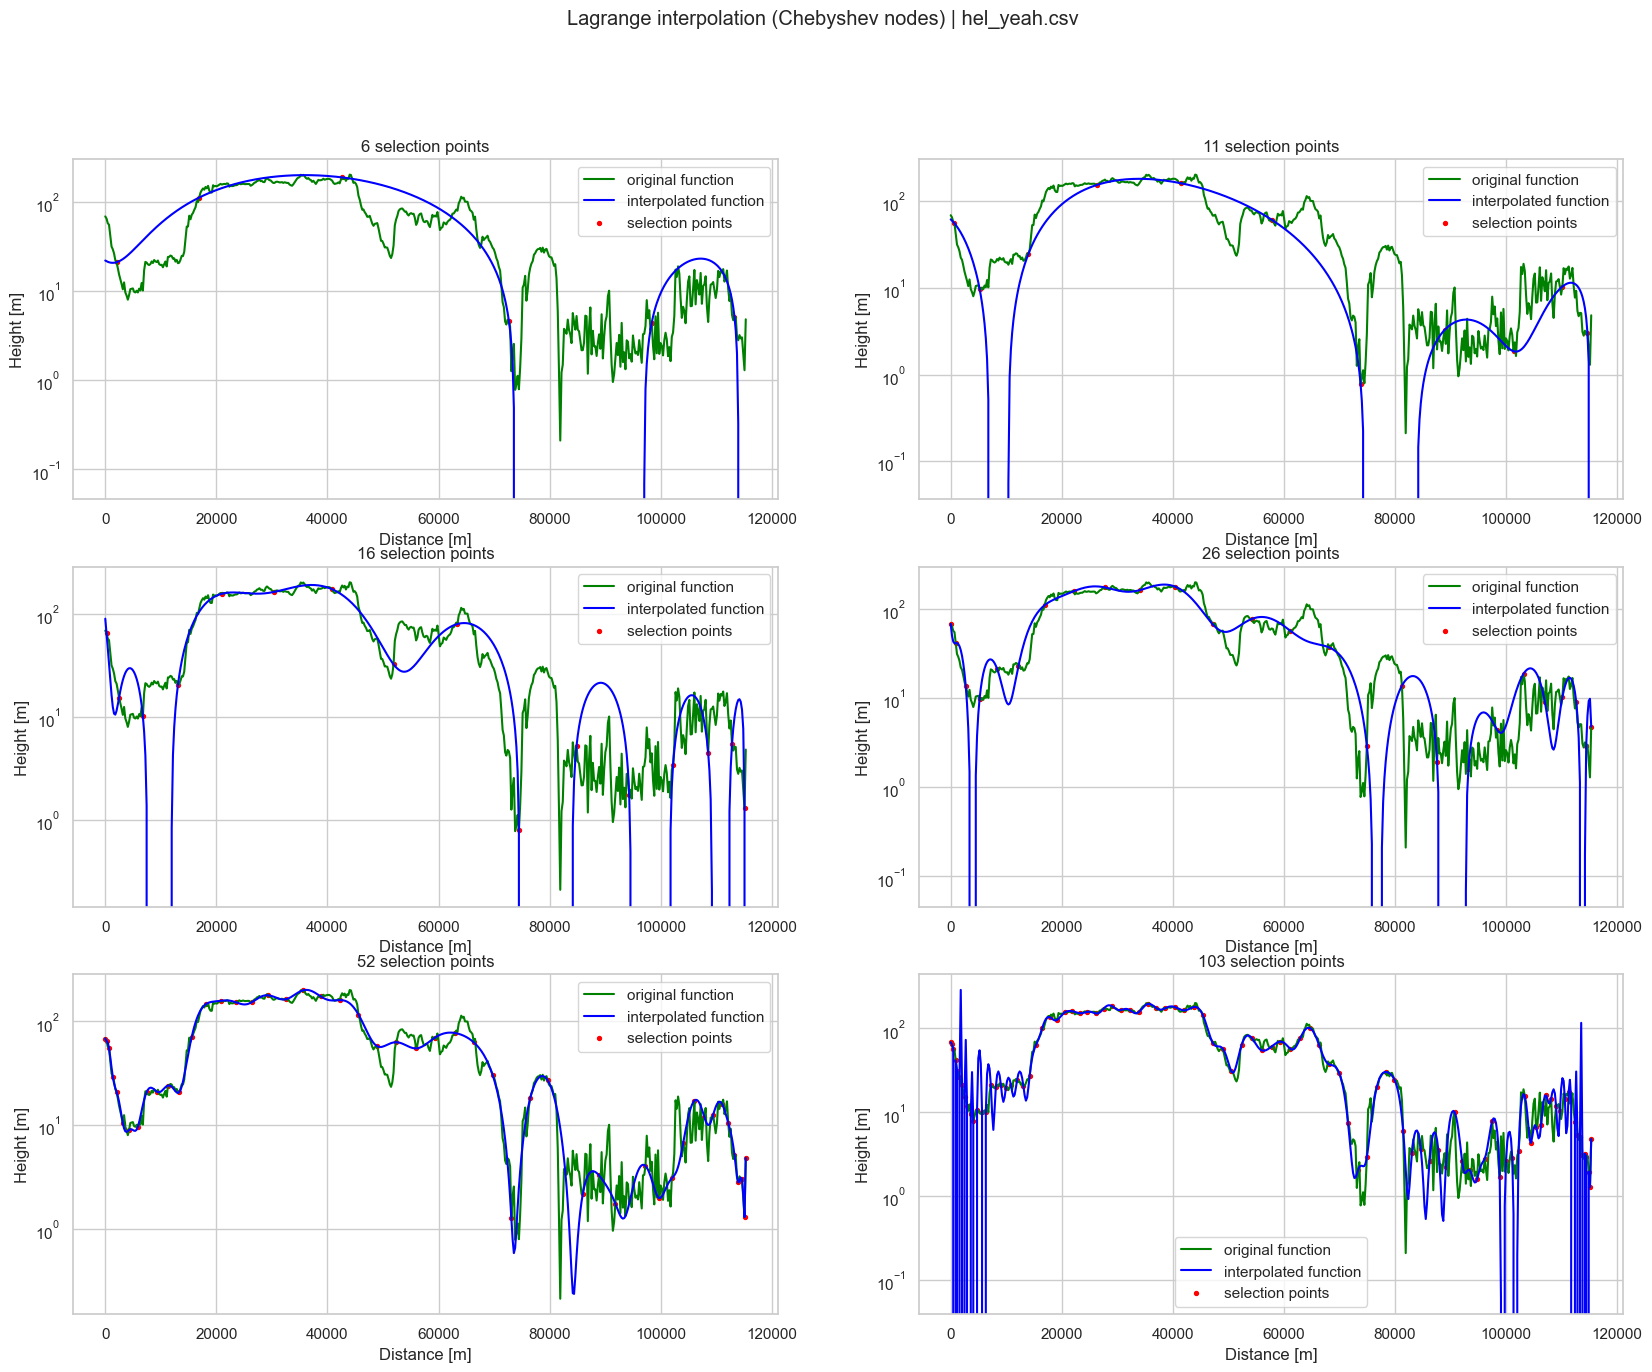

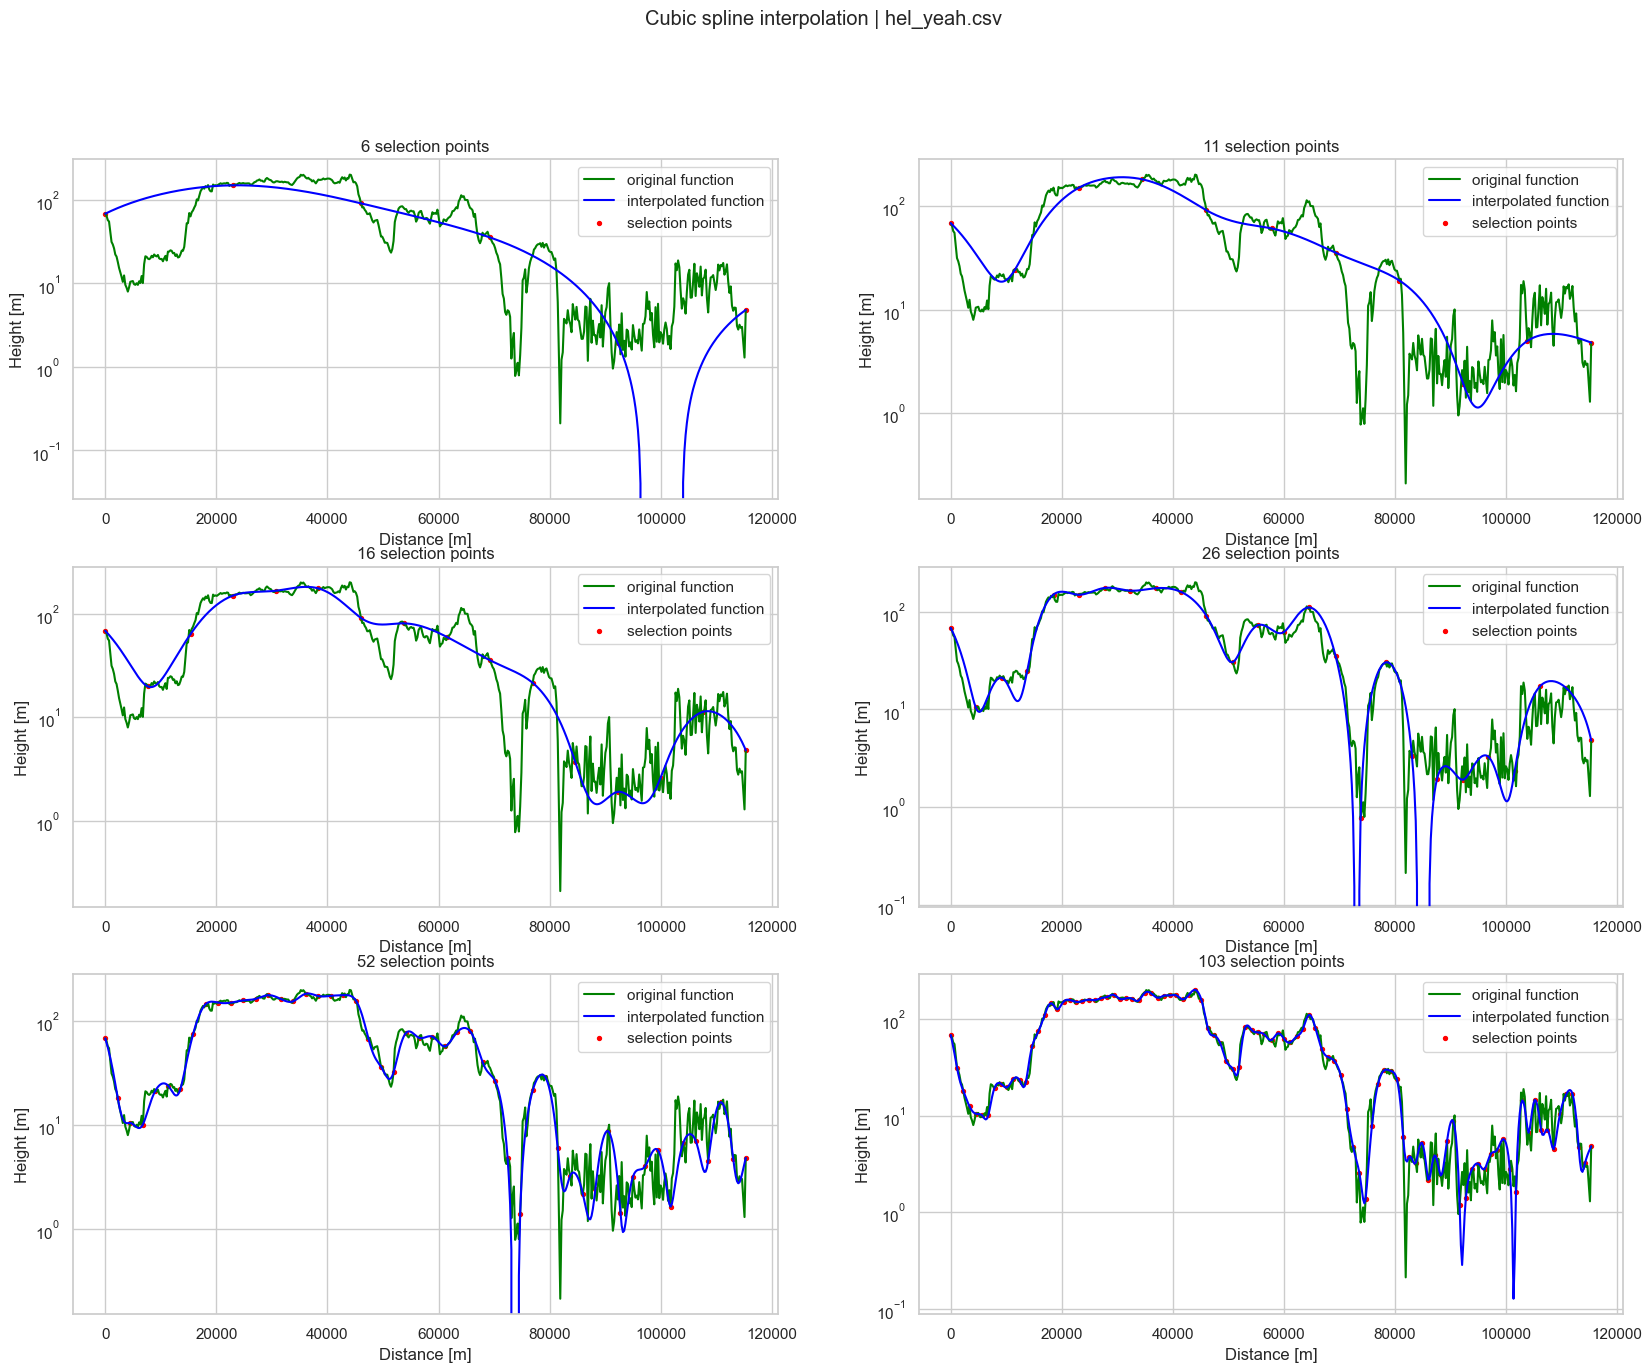

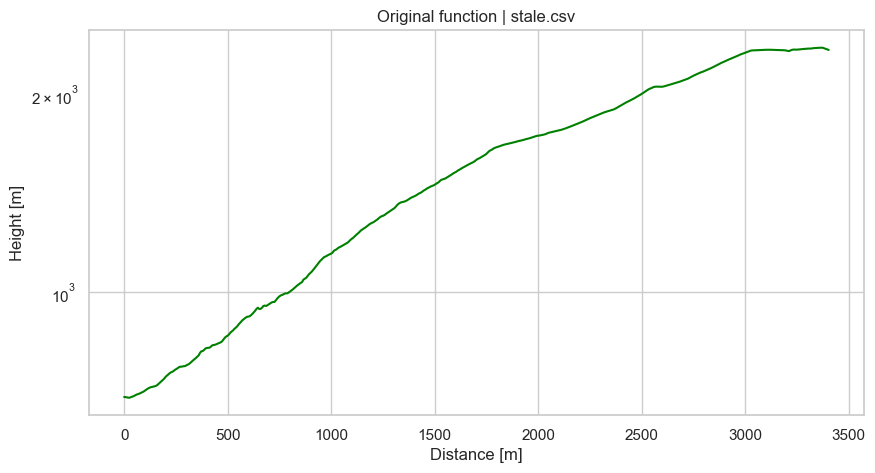

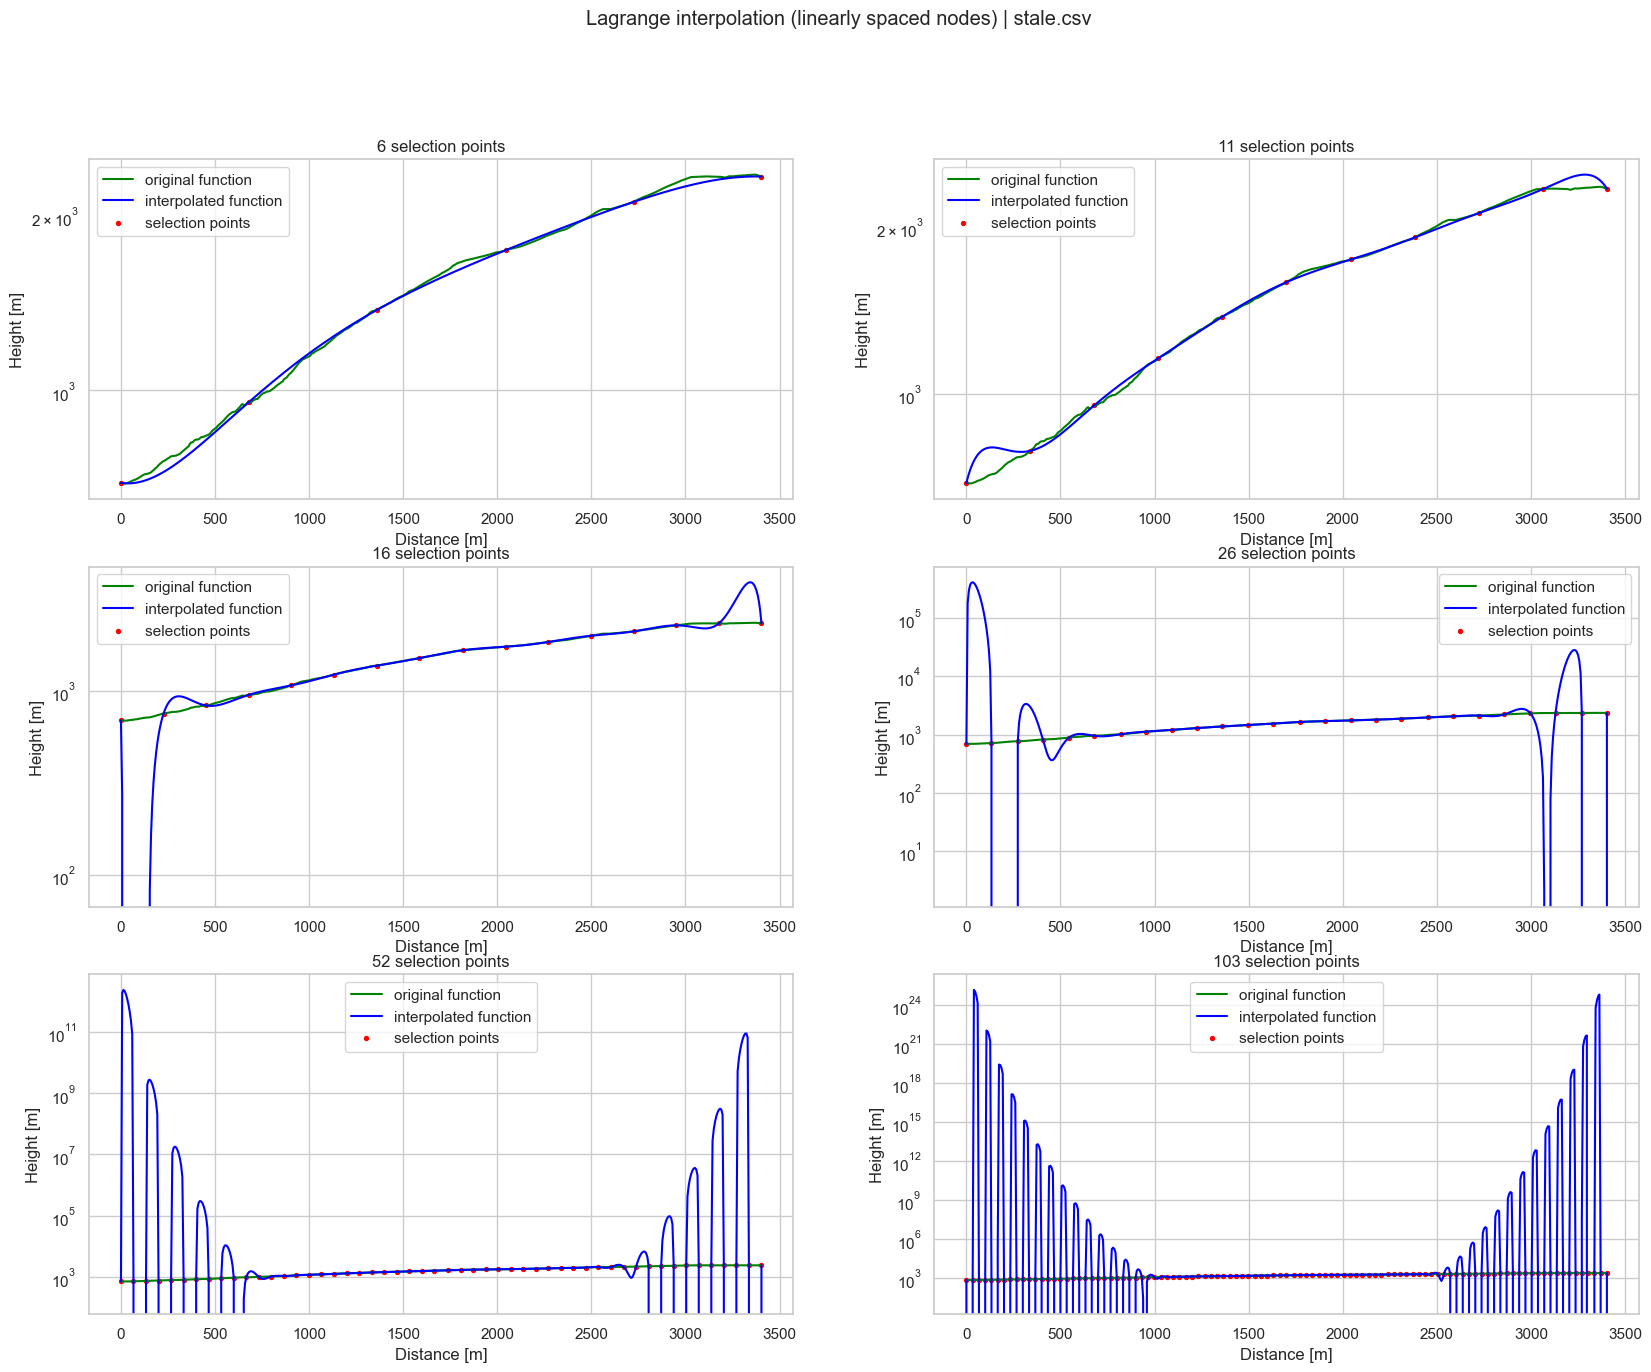

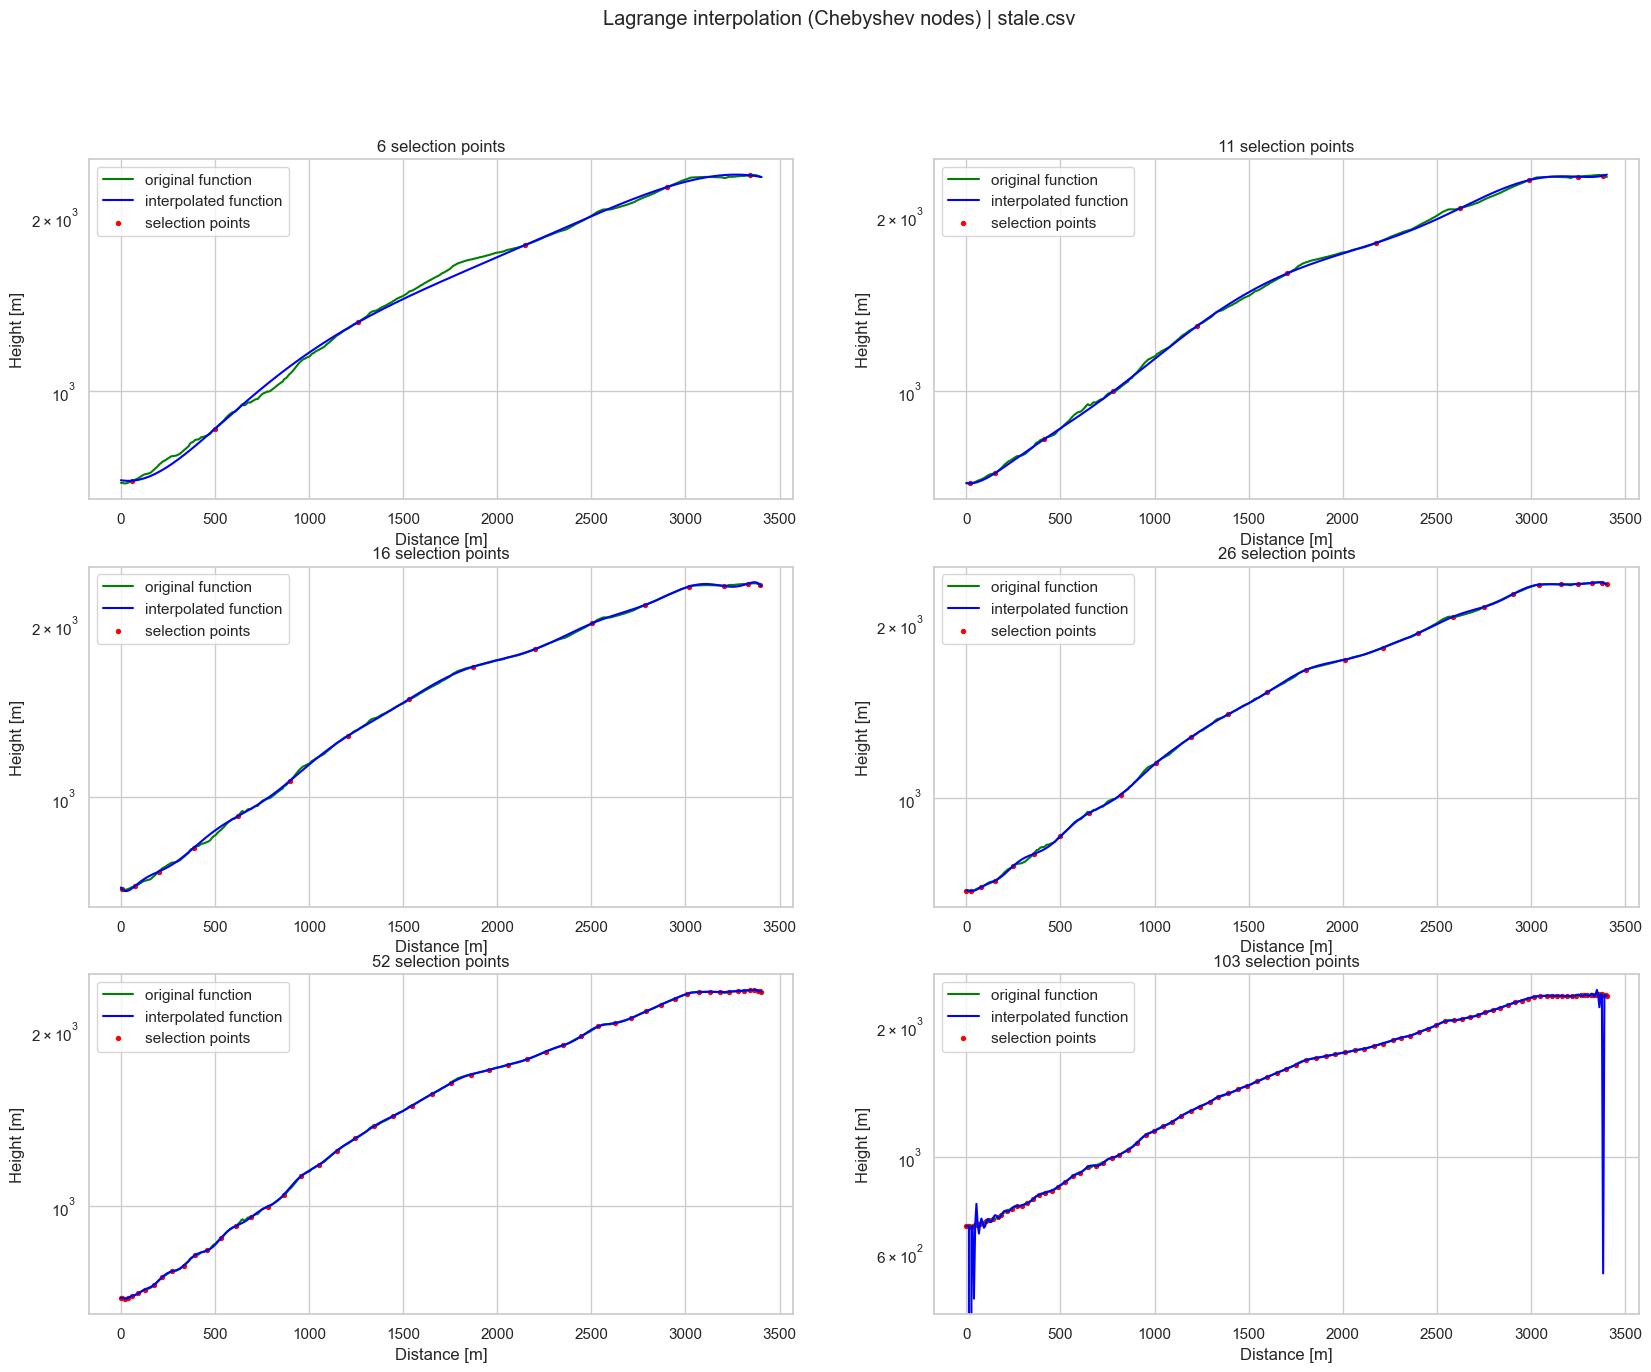

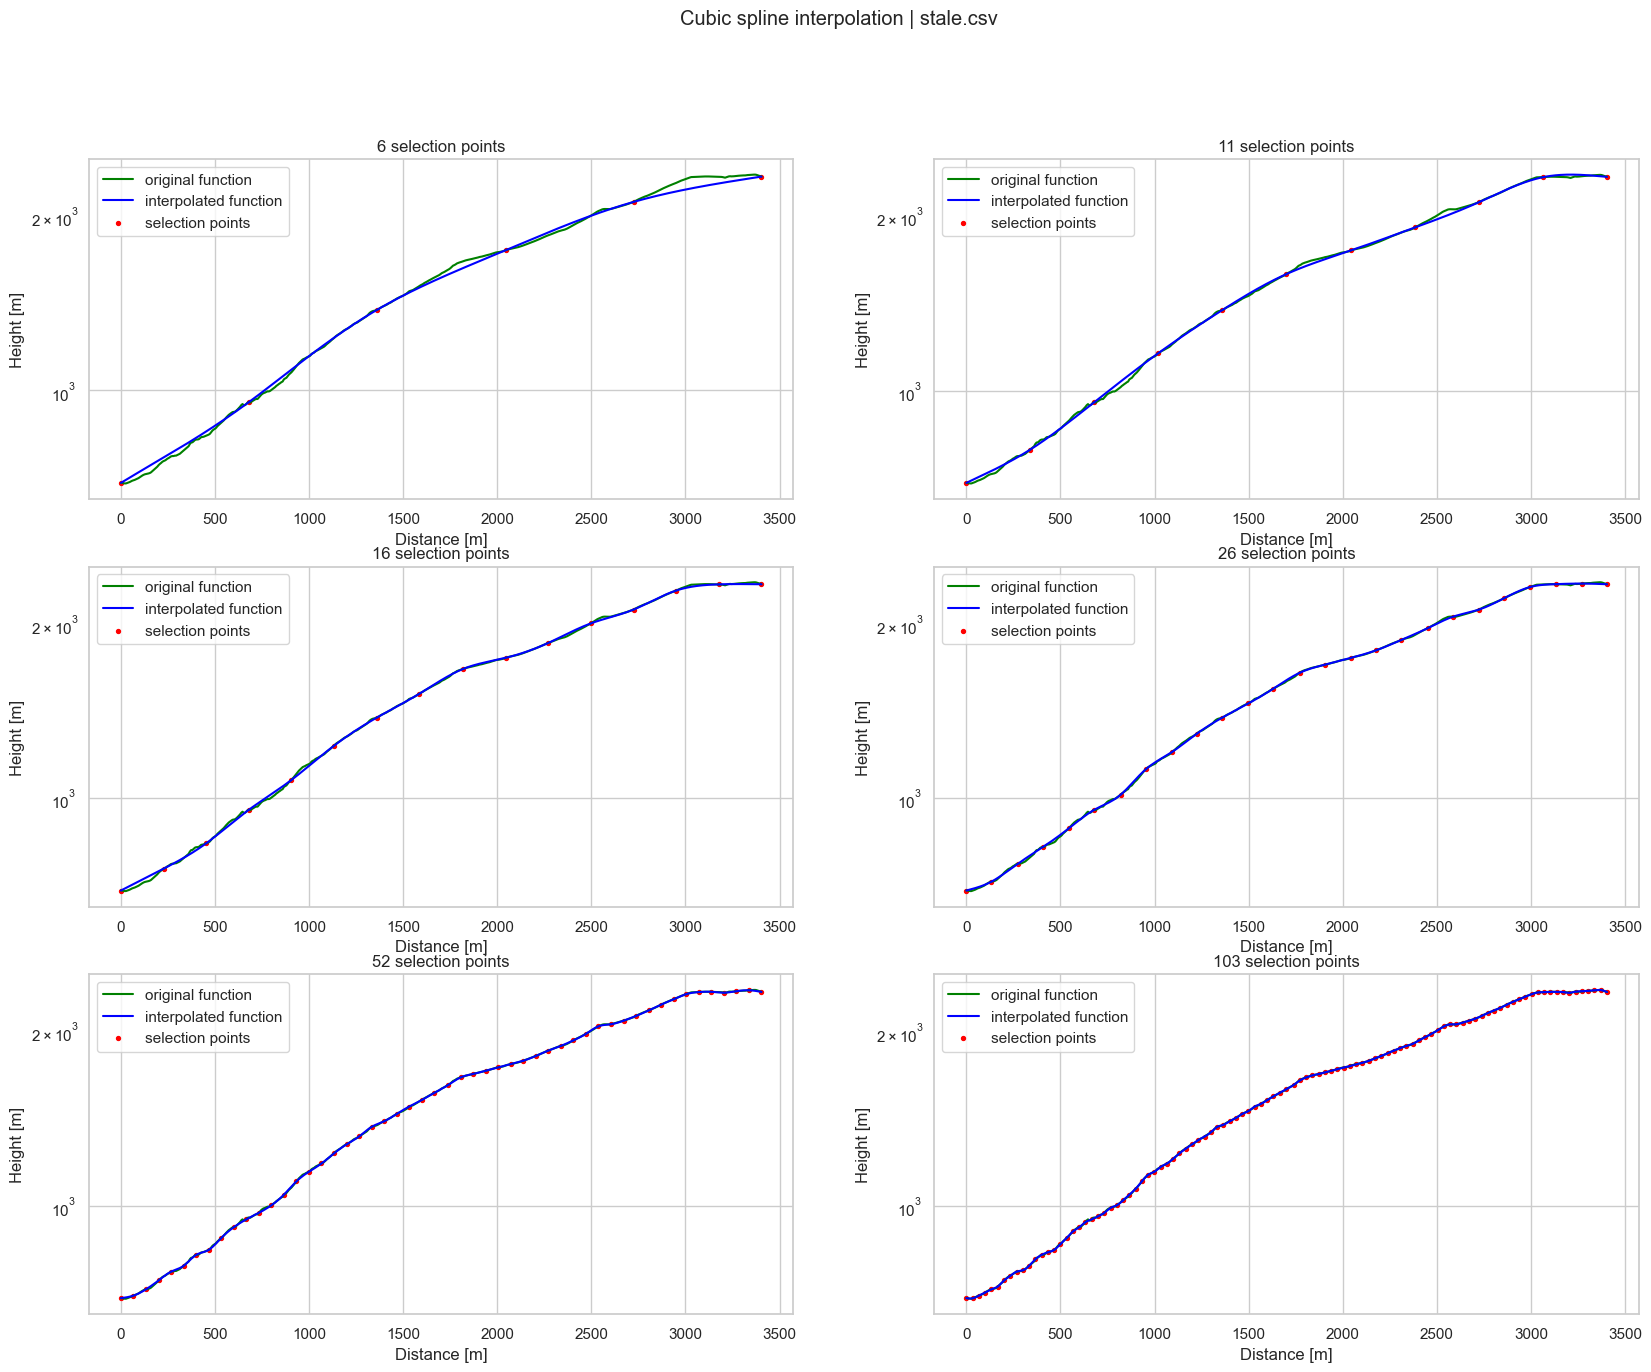

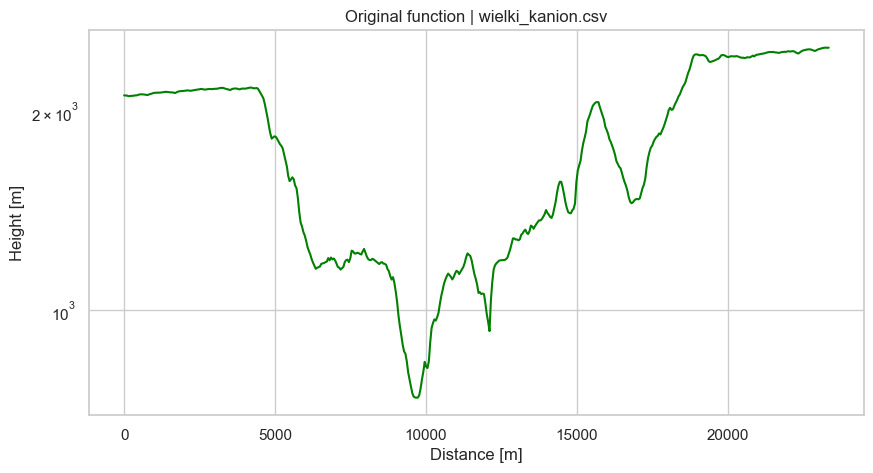

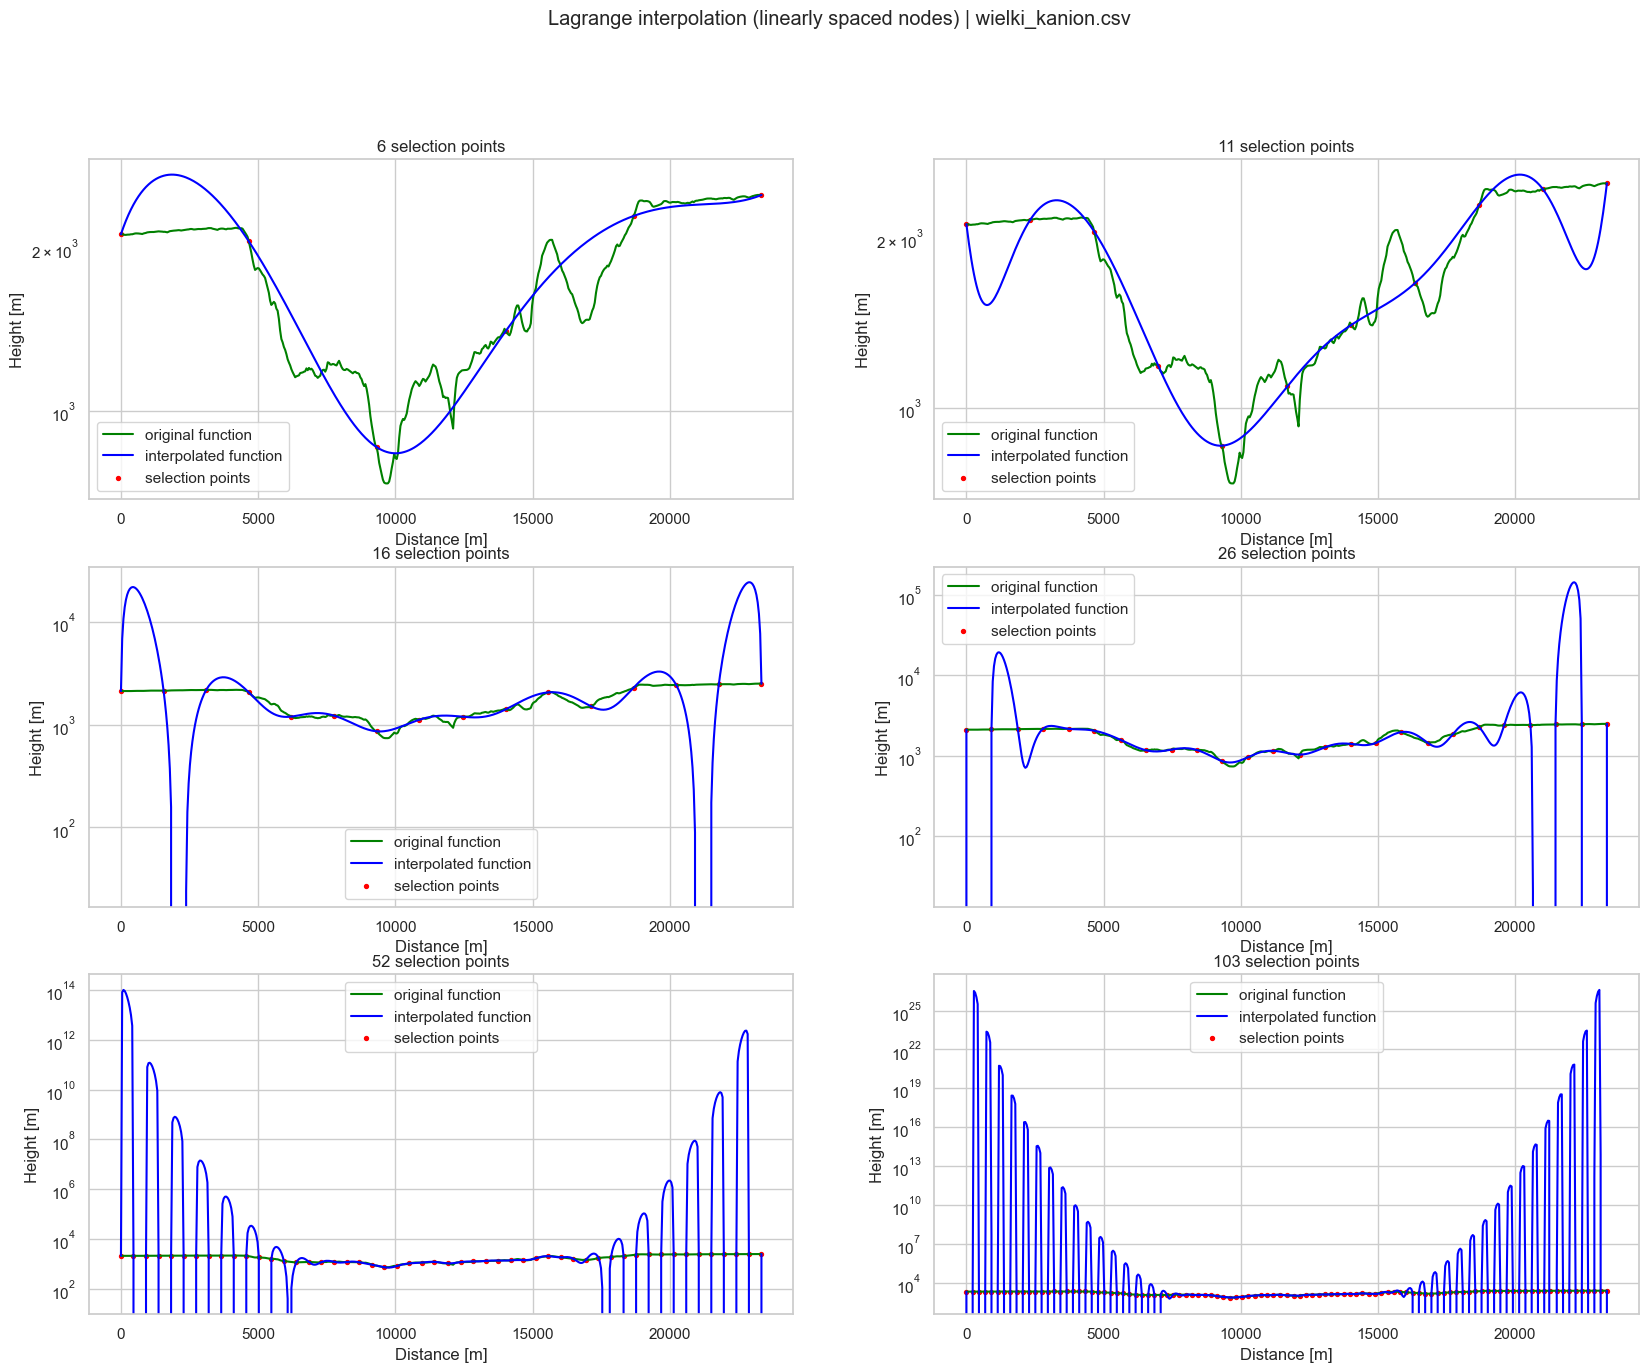

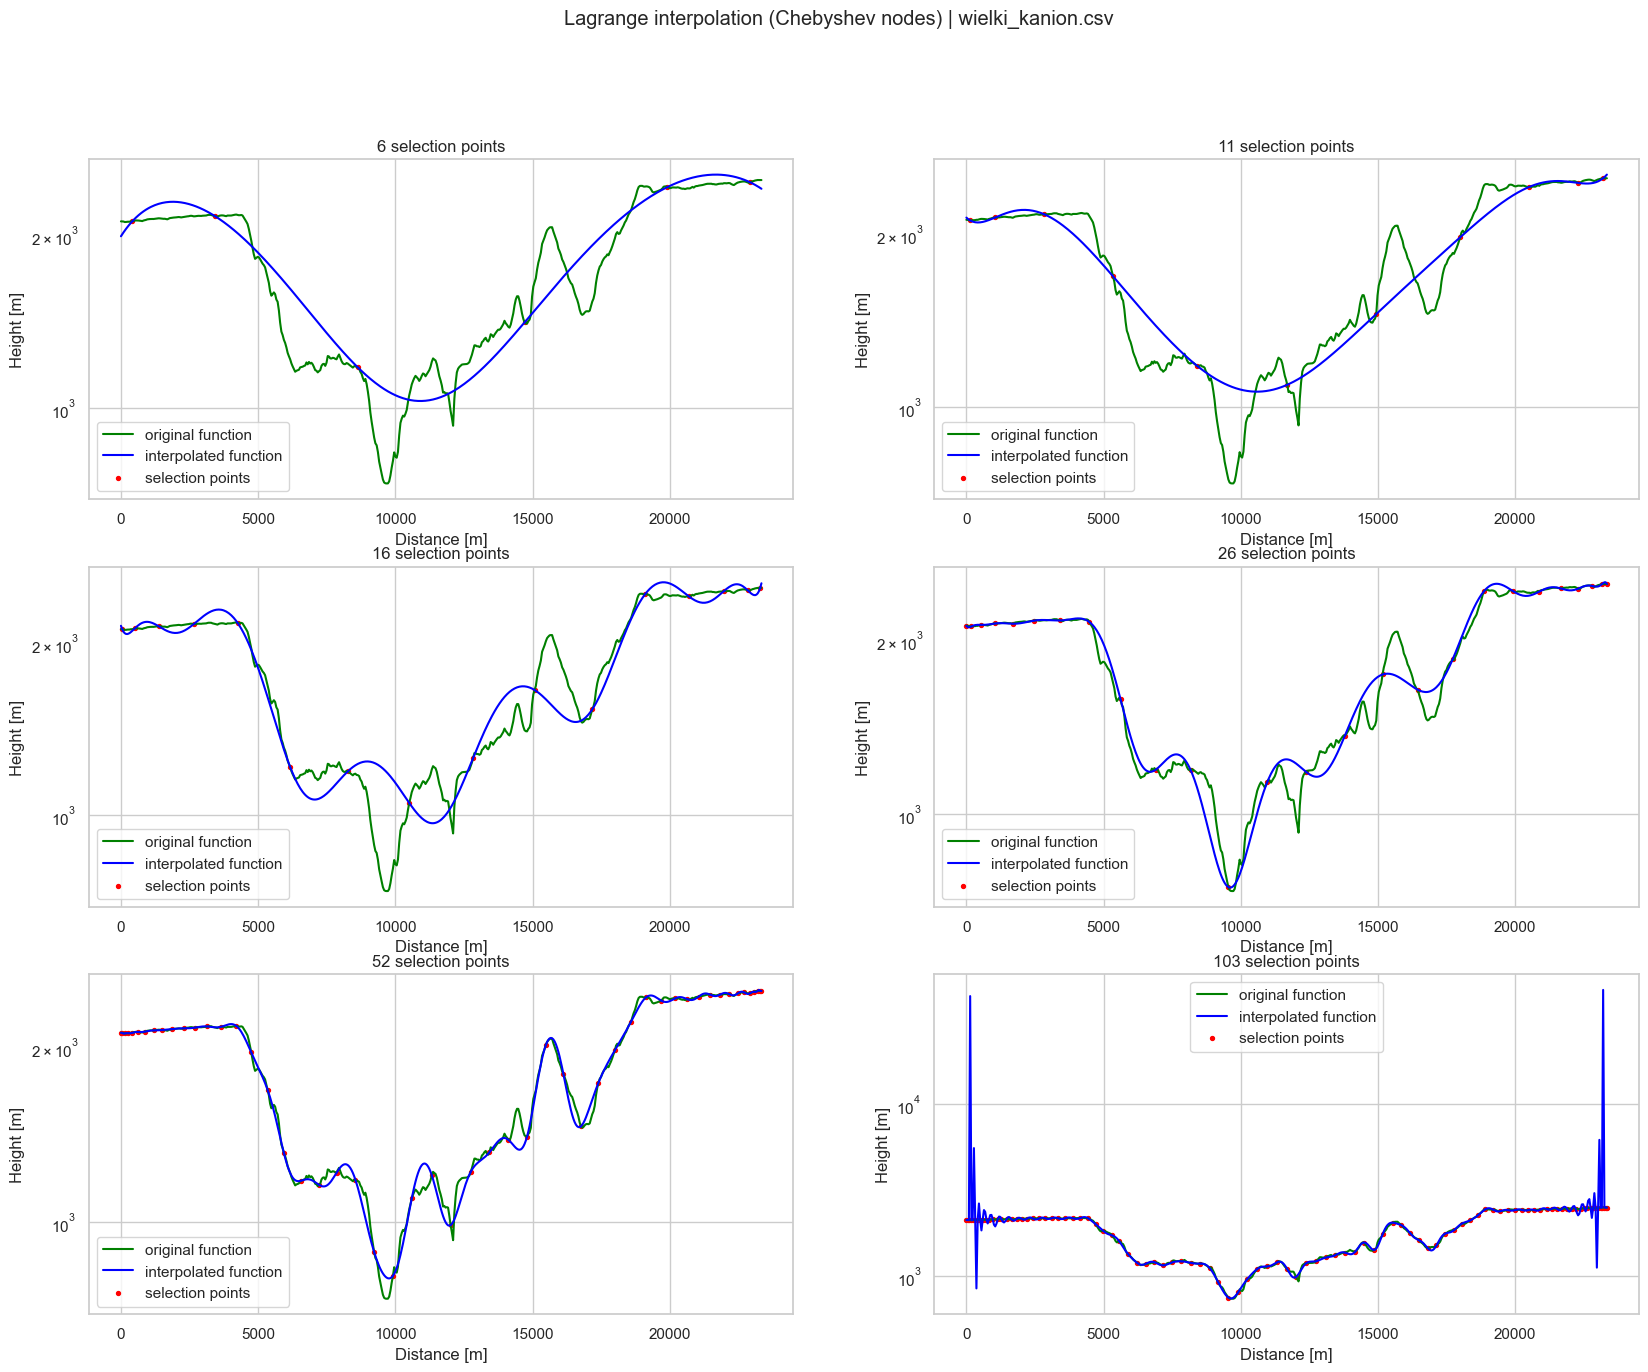

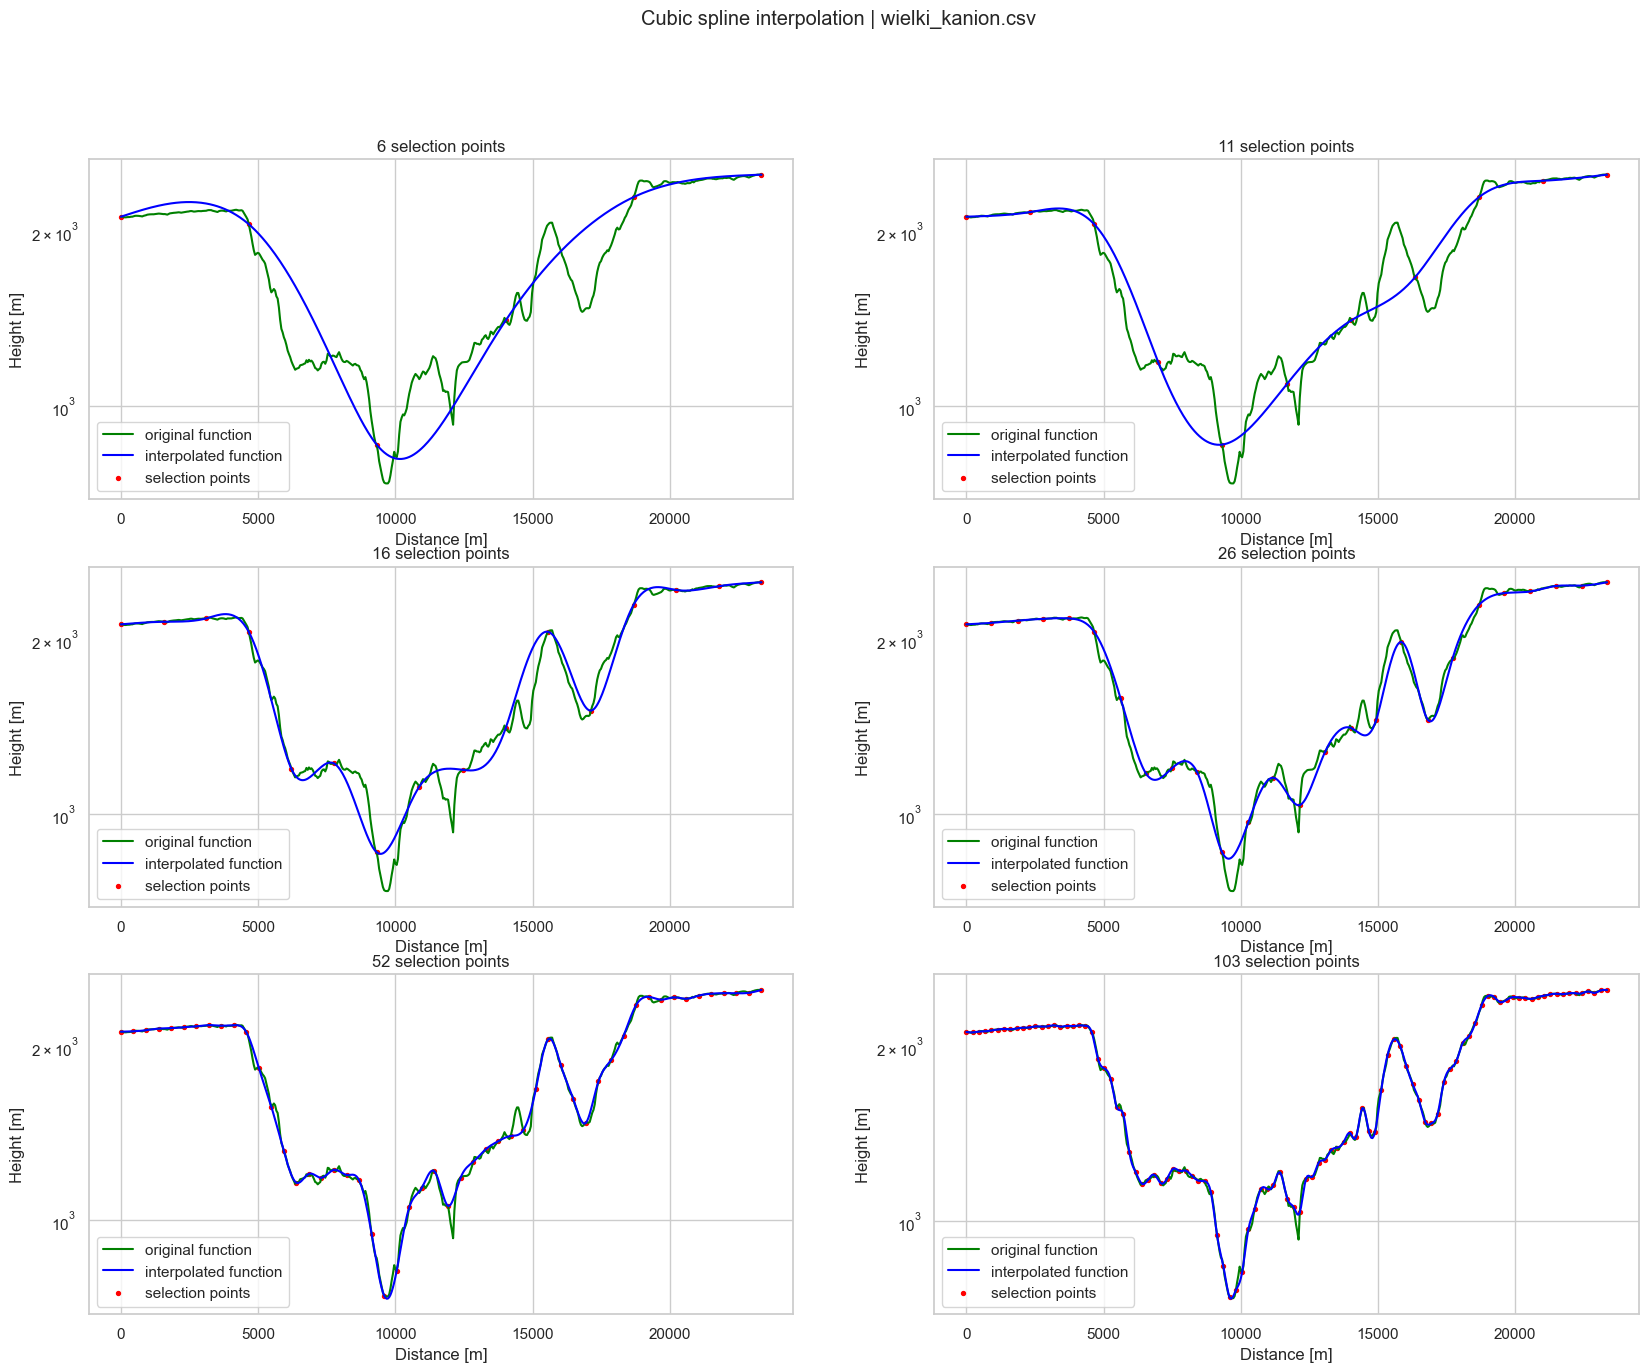

In [16]:
%reset -f
import matplotlib.pyplot as plt
import seaborn as sns
from helper import *
from typing import List, Tuple, Callable
from pathlib import Path
import os

sns.set_theme()
sns.set_style("whitegrid")

def plot_interpolation(
        handler: any,
        data: List[Tuple[float, float]],
        selection_points_strategy: Callable[[float, float, int], List[float]],
        selection_points: int,
        interpolation_method: Callable[[List[Tuple[float, float]], List[float]], List[float]],
        title: str
    ) -> None:
    selected_points = get_selection_points(data, selection_points_strategy, selection_points)
    x_points = get_interpolation_points(data, 512)
    y_points = interpolation_method(selected_points, x_points)

    handler.plot(get_x_values(data), get_y_values(data), color='green')
    handler.plot(x_points, y_points, color='blue')
    handler.scatter(get_x_values(selected_points), get_y_values(selected_points), color='red', s=8)

    handler.title.set_text(title)
    handler.set_yscale('log')
    handler.legend(['original function', 'interpolated function', 'selection points'])
    handler.set_xlabel('Distance [m]')
    handler.set_ylabel('Height [m]')

NUMBERS_OF_SELECTION_POINTS = [103, 52, 26, 16, 11, 6][::-1]
datasets = os.listdir("../data")

for dataset in datasets:
    dataset_name = dataset.replace(".csv", "")
    Path(f'../plots/{dataset_name}/').mkdir(parents=True, exist_ok=True)
    nodes = read_nodes("../data/" + dataset)

    # original function
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 5)
    ax.plot(get_x_values(nodes), get_y_values(nodes), color='green')
    ax.set_yscale('log')
    ax.set_title(f'Original function | {dataset}')
    ax.set_xlabel('Distance [m]')
    ax.set_ylabel('Height [m]')
    fig.savefig(f'../plots/{dataset_name}/original_function.png')

    # lagrange + linspace nodes
    fig, axs = plt.subplots(3, 2)
    fig.set_size_inches(20, 15)
    fig.suptitle(f'Lagrange interpolation (linearly spaced nodes) | {dataset}')
    for i in range(6):
        plot_interpolation(axs[i//2, i%2], nodes, linspace, NUMBERS_OF_SELECTION_POINTS[i], lagrange_interpolation, f'{NUMBERS_OF_SELECTION_POINTS[i]} selection points')
    fig.savefig(f'../plots/{dataset_name}/lagrange_linspace_nodes.png')

    # lagrange + chebyshev nodes
    fig, axs = plt.subplots(3, 2)
    fig.set_size_inches(20, 15)
    fig.suptitle(f'Lagrange interpolation (Chebyshev nodes) | {dataset}')
    for i in range(6):
        plot_interpolation(axs[i//2, i%2], nodes, chebyshev_nodes, NUMBERS_OF_SELECTION_POINTS[i], lagrange_interpolation, f'{NUMBERS_OF_SELECTION_POINTS[i]} selection points')
    fig.savefig(f'../plots/{dataset_name}/lagrange_chebyshev_nodes.png')

    # cubic spline
    fig, axs = plt.subplots(3, 2)
    fig.set_size_inches(20, 15)
    fig.suptitle(f'Cubic spline interpolation | {dataset}')
    for i in range(6):
        plot_interpolation(axs[i//2, i%2], nodes, linspace, NUMBERS_OF_SELECTION_POINTS[i], cubic_spline_interpolation, f'{NUMBERS_OF_SELECTION_POINTS[i]} selection points')
    fig.savefig(f'../plots/{dataset_name}/cubic_spline.png')